In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import sklearn
import math
import sys

# Print versions
print("Versions of installed libraries:")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib.pyplot: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"geopy: {geopy.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"math: {sys.version}")  # Displays Python version

Versions of installed libraries:
numpy: 1.26.4
pandas: 2.2.2
matplotlib.pyplot: 3.8.4
seaborn: 0.13.2
geopy: 2.4.1
scikit-learn: 1.4.2
math: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [3]:
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

In [5]:
dfc.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [7]:
# change data format
dfc['date'] = pd.to_datetime(dfc['date'], format='%Y-%m-%d')
# add bulan and tahun coloumns
dfc['bulan'] = dfc['date'].dt.month
dfc['tahun'] = dfc['date'].dt.year

In [9]:
dfc.head()

listing_id       date available   price  bulan  tahun
0      241032 2016-01-04         t  $85.00      1   2016
1      241032 2016-01-05         t  $85.00      1   2016
2      241032 2016-01-06         f     NaN      1   2016
3      241032 2016-01-07         f     NaN      1   2016
4      241032 2016-01-08         f     NaN      1   2016

In [11]:
dfc['bulan'] = dfc['date'].dt.strftime('%B')  # '%B' to make month name in text

In [13]:
dfc.head()

listing_id       date available   price    bulan  tahun
0      241032 2016-01-04         t  $85.00  January   2016
1      241032 2016-01-05         t  $85.00  January   2016
2      241032 2016-01-06         f     NaN  January   2016
3      241032 2016-01-07         f     NaN  January   2016
4      241032 2016-01-08         f     NaN  January   2016

In [15]:
dfc['price'] = dfc['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [16]:
dfc = dfc.rename({'price': 'pendapatan'}, axis=1)

In [19]:
dfc.head()

listing_id       date available  pendapatan    bulan  tahun
0      241032 2016-01-04         t        85.0  January   2016
1      241032 2016-01-05         t        85.0  January   2016
2      241032 2016-01-06         f         NaN  January   2016
3      241032 2016-01-07         f         NaN  January   2016
4      241032 2016-01-08         f         NaN  January   2016

In [21]:
# delete null
dfc_cleaned = dfc.dropna()

In [23]:
# month mapping
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [25]:
# make month coloumn in numeric
dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)

C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\570337631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)


In [27]:
dfc_cleaned.head()

listing_id       date available  pendapatan    bulan  tahun  bulan_num
0       241032 2016-01-04         t        85.0  January   2016          1
1       241032 2016-01-05         t        85.0  January   2016          1
9       241032 2016-01-13         t        85.0  January   2016          1
10      241032 2016-01-14         t        85.0  January   2016          1
14      241032 2016-01-18         t        85.0  January   2016          1

In [29]:
# sort per month
dfc_cleaned = dfc_cleaned.sort_values(by=['listing_id','tahun','bulan_num'])
dfc_cleaned.head()

listing_id       date available  pendapatan     bulan  tahun  \
797216        3335 2016-02-29         t       120.0  February   2016   
797217        3335 2016-03-01         t       120.0     March   2016   
797218        3335 2016-03-02         t       120.0     March   2016   
797219        3335 2016-03-03         t       120.0     March   2016   
797220        3335 2016-03-04         t       120.0     March   2016   

        bulan_num  
797216          2  
797217          3  
797218          3  
797219          3  
797220          3

In [31]:
dfc_r = dfc_cleaned[['listing_id','date','bulan_num','tahun','pendapatan']]
dfc_r.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [33]:
df1 = dfc_r
df1.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [35]:
# median price per month for every id, and count id in every month-year
df1g = df1.groupby(['listing_id', 'tahun', 'bulan_num']).agg(
    pendapatan_per_bulan=('pendapatan', 'sum'),
    median_price=('pendapatan', 'median'),
    jumlah_customer=('listing_id', 'size')
).reset_index()

In [37]:
df1g

listing_id  tahun  bulan_num  pendapatan_per_bulan  median_price  \
0            3335   2016          2                 120.0         120.0   
1            3335   2016          3                3720.0         120.0   
2            3335   2016          4                3600.0         120.0   
3            3335   2016          5                3720.0         120.0   
4            3335   2016          6                3600.0         120.0   
...           ...    ...        ...                   ...           ...   
36110    10340165   2016          9                1290.0          43.0   
36111    10340165   2016         10                1333.0          43.0   
36112    10340165   2016         11                1290.0          43.0   
36113    10340165   2016         12                1333.0          43.0   
36114    10340165   2017          1                  86.0          43.0   

       jumlah_customer  
0                    1  
1                   31  
2                   30  
3                   31  
4                   30  
...                ...  
36110               30  
36111               31  
36112               30  
36113               31  
36114                2  

[36115 rows x 6 columns]

In [39]:
df1.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [41]:
#rename id to listing_id
dfl = dfl.rename({'id': 'listing_id'}, axis=1)

#choose relevant coloumns
dfl2 = dfl[['listing_id','name','host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified','zipcode','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','guests_included','minimum_nights','maximum_nights','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']]

In [43]:
# change data type string to float
dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['monthly_price'] = dfl2['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['host_response_rate'] = dfl2['host_response_rate'].str.replace('%', '').astype(float)
dfl2['host_acceptance_rate'] = dfl2['host_acceptance_rate'].str.replace('%', '').astype(float)

# change data type integer to string
dfl2['host_id'] = dfl2['host_id'].astype(str)
dfl2['latitude'] = dfl2['latitude'].astype(str)
dfl2['longitude'] = dfl2['longitude'].astype(str)

C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\847517600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\847517600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\847517600.py:4: SettingWithCopyWarning: 
A value 

In [45]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   float64
 5   host_acceptance_rate              3045 non-null   float64
 6   host_is_superhost                 3816 non-null   object 
 7   host_identity_verified            3816 non-null   object 
 8   zipcode                           3811 non-null   object 
 9   latitude                          3818 non-null   object 
 10  longitude                         3818 non-null   object 
 11  is_location_exact                 3818 non-null   object 
 12  proper

In [47]:
df1g2 = df1g [['listing_id', 'pendapatan_per_bulan','jumlah_customer']]

In [49]:
df1g2

listing_id  pendapatan_per_bulan  jumlah_customer
0            3335                 120.0                1
1            3335                3720.0               31
2            3335                3600.0               30
3            3335                3720.0               31
4            3335                3600.0               30
...           ...                   ...              ...
36110    10340165                1290.0               30
36111    10340165                1333.0               31
36112    10340165                1290.0               30
36113    10340165                1333.0               31
36114    10340165                  86.0                2

[36115 rows x 3 columns]

In [51]:
df1g3 = df1g2.groupby(['listing_id']).agg(
    mean_income=('pendapatan_per_bulan', 'mean'),
    mean_customer=('jumlah_customer', 'mean')).reset_index()

In [53]:
df1g3

listing_id  mean_income  mean_customer
0           3335  3090.000000      25.750000
1           4291  2302.307692      28.076923
2           5682  1282.230769      23.769231
3           6606  2606.923077      28.076923
4           7369  1126.250000      13.250000
...          ...          ...            ...
3718    10331249  1225.384615      27.230769
3719    10332096  1123.076923      28.076923
3720    10334184  3332.307692      27.769231
3721    10339145  6679.615385      28.076923
3722    10340165  1184.153846      27.538462

[3723 rows x 3 columns]

In [55]:
# merge df1g3 and dfl2 based on 'listing_id to make jumlah_id coloumn in listing dataset
dfl3 = pd.merge(df1g3, dfl2, on='listing_id', how='left')
dfl3.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                88.0                 100.0                 f   
1               100.0                 100.0                 f   
2               100.0                 100.0                 f   
3                90.0                 100.0                 f   
4                 NaN                   NaN                 f   

  host_identity_verified  ... review_scores_accuracy  \
0                      t  ...                    NaN   
1                      t  ...                   10.0   
2                      t  ...                   10.0   
3                      t  ...                    9.0   
4                      f  ...                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       NaN                   NaN                         NaN   
1                       9.0                  10.0                         9.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                         9.0   
4                      10.0                  10.0                        10.0   

  review_scores_location review_scores_value  instant_bookable  \
0                    NaN                 NaN                 f   
1                    9.0                 9.0                 f   
2                    9.0                10.0                 t   
3                   10.0                 9.0                 f   
4                   10.0                 9.0                 f   

   cancellation_policy  require_guest_profile_picture  \
0               strict                              f   
1             moderate                              f   
2               strict                              f   
3               strict                              f   
4             flexible                              f   

   require_guest_phone_verification  
0                                 f  
1                                 f  
2                                 t  
3                                 f  
4                                 f  

[5 rows x 38 columns]

In [57]:
df2 = dfl3

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [61]:
#only for eda, delete listing_id coloumn
df2_without_id = df2.drop(columns=['listing_id'])

In [63]:
cats2 = df2_without_id.select_dtypes(include=['object'])
nums2 = df2_without_id.select_dtypes(include=['float64', 'int64'])

In [65]:
#
print("Kolom kategorikal (cats2):")
print(cats2.columns.tolist())

#
print("Kolom kategorikal (nums2):")
print(nums2.columns.tolist())

Kolom kategorikal (cats2):
['name', 'host_id', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
Kolom kategorikal (nums2):
['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [67]:
#
nums2 = ['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price',
'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# divide nums2 to 4 function, each function has 5 coloumns
nums21 = nums2[:5]
nums22 = nums2[5:10]
nums23 = nums2[10:15]
nums24 = nums2[15:]

print(nums21)
print(nums22)
print(nums23)
print(nums24)

['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates']
['bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price']
['monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating']
['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [69]:
print(nums2)

['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [71]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                88.0                 100.0                 f   
1               100.0                 100.0                 f   
2               100.0                 100.0                 f   
3                90.0                 100.0                 f   
4                 NaN                   NaN                 f   

  host_identity_verified  ... review_scores_accuracy  \
0                      t  ...                    NaN   
1                      t  ...                   10.0   
2                      t  ...                   10.0   
3                      t  ...                    9.0   
4                      f  ...                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       NaN                   NaN                         NaN   
1                       9.0                  10.0                         9.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                         9.0   
4                      10.0                  10.0                        10.0   

  review_scores_location review_scores_value  instant_bookable  \
0                    NaN                 NaN                 f   
1                    9.0                 9.0                 f   
2                    9.0                10.0                 t   
3                   10.0                 9.0                 f   
4                   10.0                 9.0                 f   

   cancellation_policy  require_guest_profile_picture  \
0               strict                              f   
1             moderate                              f   
2               strict                              f   
3               strict                              f   
4             flexible                              f   

   require_guest_phone_verification  
0                                 f  
1                                 f  
2                                 t  
3                                 f  
4                                 f  

[5 rows x 38 columns]

# EDA

## Descriptive Analysis

### df2

In [76]:
# check null data
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| mean_income                      |    0 |
| mean_customer                    |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [78]:
print(df2.describe().T.to_markdown())

|                             |   count |           mean |            std |   min |            25% |            50% |           75% |              max |
|:----------------------------|--------:|---------------:|---------------:|------:|---------------:|---------------:|--------------:|-----------------:|
| listing_id                  |    3723 |    5.54805e+06 |    2.96979e+06 |  3335 |    3.24243e+06 |    6.11982e+06 |    8.0368e+06 |      1.03402e+07 |
| mean_income                 |    3723 | 3300.57        | 2555.88        |    49 | 1760           | 2601.54        | 4103.85       |  27918.5         |
| mean_customer               |    3723 |   24.2053      |    5.66746     |     1 |   22.4167      |   26.5385      |   28          |     30.5         |
| host_response_rate          |    3243 |   94.8545      |   11.9244      |    17 |   98           |  100           |  100          |    100           |
| host_acceptance_rate        |    3000 |   99.9667      |    1.82574     |     0 

## Univariate Analysis

### df2

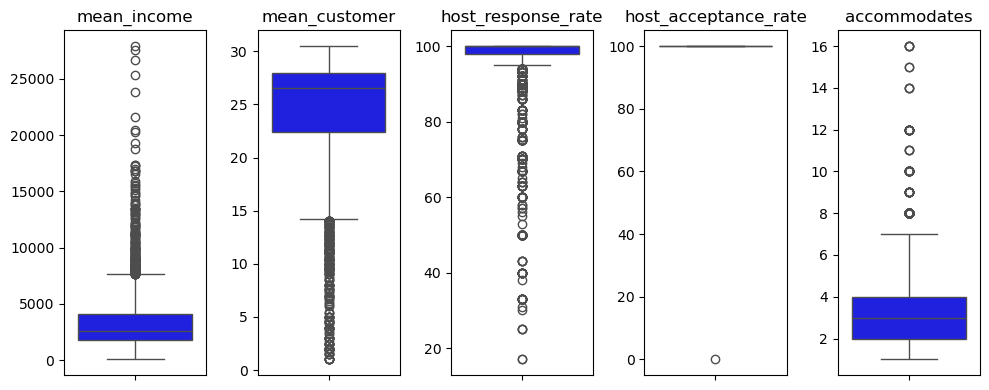

In [82]:
num_cols = 5  # The desired number of columns
num_rows = -(-len(nums21) // num_cols)  # Calculate the number of rows automatically

# Set the figure size and create a subplot
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
for i, column in enumerate(nums21):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='blue', orient='v')
    plt.title(column)  # Add titles for each subplot
    plt.ylabel('')  # Remove y labels on subplots other than the leftmost one

plt.tight_layout()
plt.show()

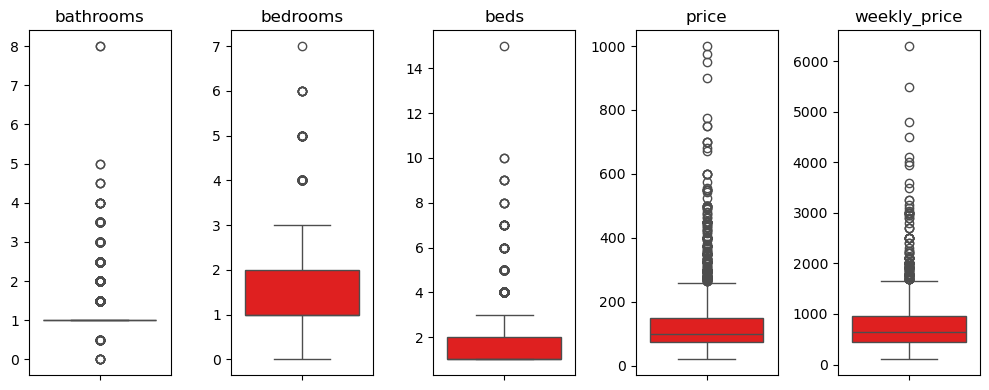

In [83]:
num_cols = 5 
num_rows = -(-len(nums22) // num_cols)

#
plt.figure(figsize=(10, 4))
for i, column in enumerate(nums22):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='red', orient='v')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

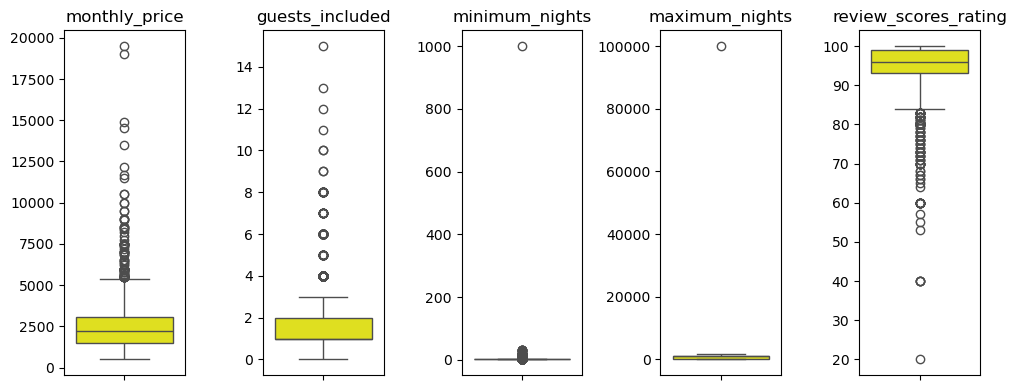

In [86]:
num_cols = 5
num_rows = -(-len(nums23) // num_cols)

#
plt.figure(figsize=(10, 4))
for i, column in enumerate(nums23):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='yellow', orient='v')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

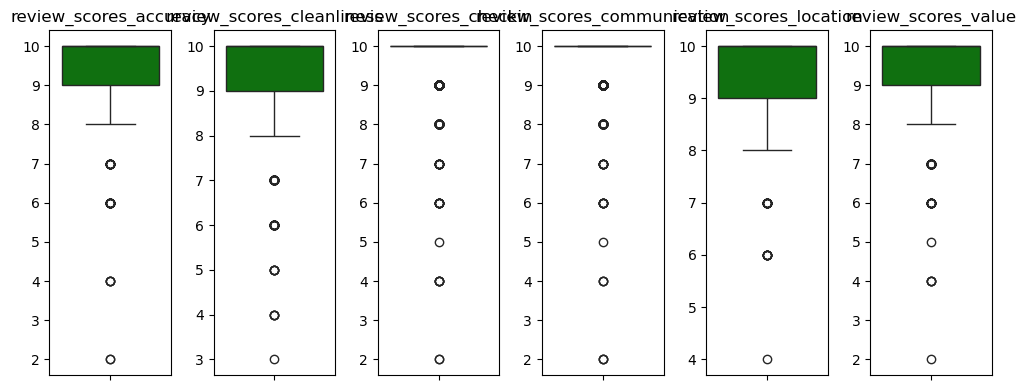

In [88]:
num_cols = 6
num_rows = -(-len(nums24) // num_cols)

#
plt.figure(figsize=(10, 4))  
for i, column in enumerate(nums24):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='green', orient='v')
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()

## Multivariate Analysis

### df2

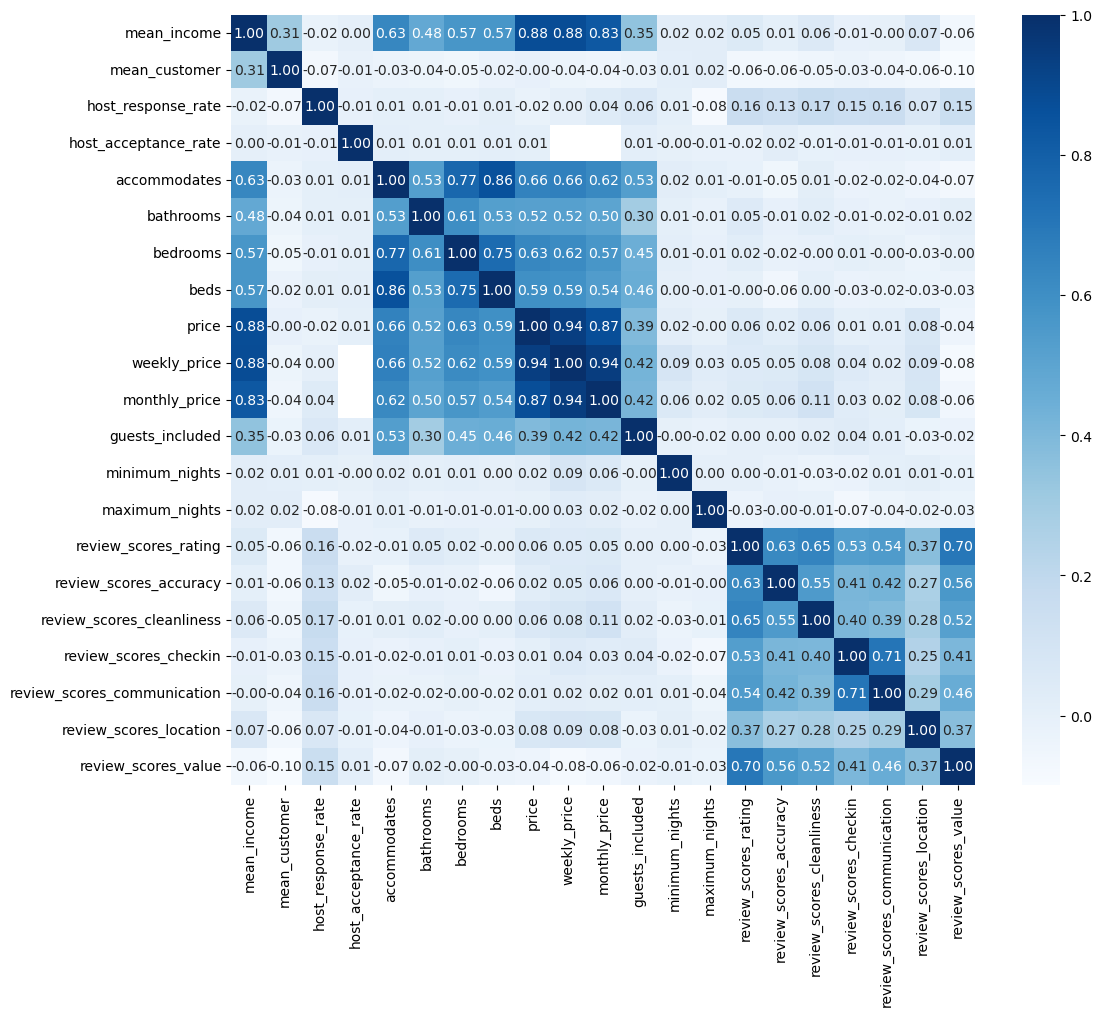

In [92]:
numeric_df = df2[['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

## Business Insight

In [95]:
df1.tail()

listing_id       date  bulan_num  tahun  pendapatan
744230    10340165 2016-12-29         12   2016        43.0
744231    10340165 2016-12-30         12   2016        43.0
744232    10340165 2016-12-31         12   2016        43.0
744233    10340165 2017-01-01          1   2017        43.0
744234    10340165 2017-01-02          1   2017        43.0

In [97]:
df1g2.head()

listing_id  pendapatan_per_bulan  jumlah_customer
0        3335                 120.0                1
1        3335                3720.0               31
2        3335                3600.0               30
3        3335                3720.0               31
4        3335                3600.0               30

In [99]:
df1_group_tren = df1g [['listing_id', 'bulan_num','pendapatan_per_bulan','jumlah_customer']]

In [101]:
df1_group_tren

listing_id  bulan_num  pendapatan_per_bulan  jumlah_customer
0            3335          2                 120.0                1
1            3335          3                3720.0               31
2            3335          4                3600.0               30
3            3335          5                3720.0               31
4            3335          6                3600.0               30
...           ...        ...                   ...              ...
36110    10340165          9                1290.0               30
36111    10340165         10                1333.0               31
36112    10340165         11                1290.0               30
36113    10340165         12                1333.0               31
36114    10340165          1                  86.0                2

[36115 rows x 4 columns]

In [103]:
df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\2264836592.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()


In [105]:
df1_group_tren2

bulan_num  jumlah_cust
0           1        64937
1           2        73321
2           3        83938
3           4        76037
4           5        79971
5           6        77244
6           7        74222
7           8        76347
8           9        77246
9          10        82438
10         11        81780
11         12        87061

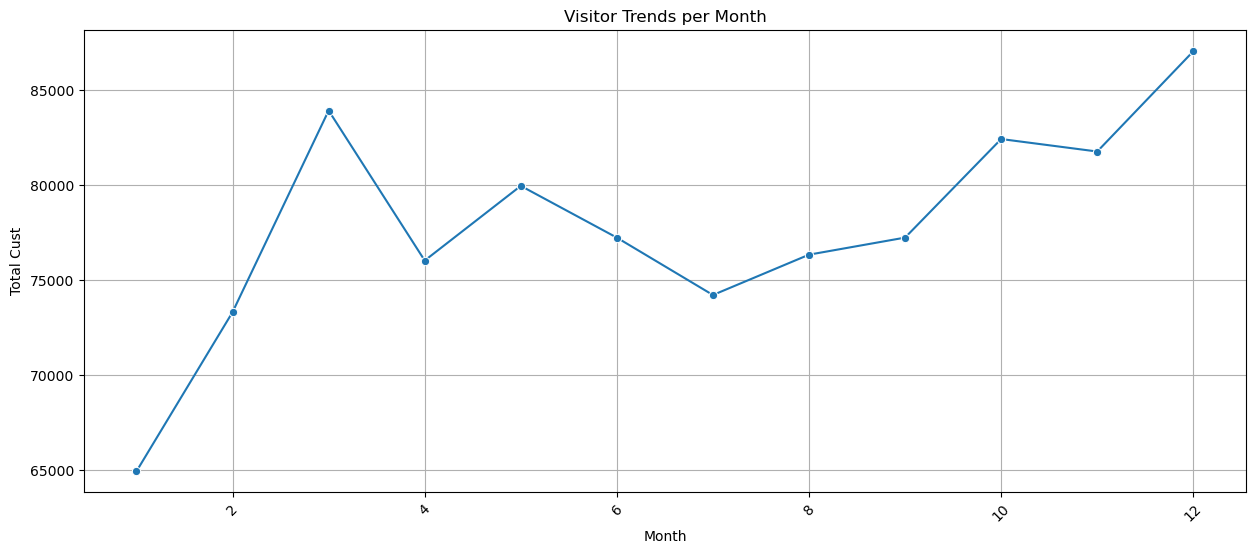

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot tren
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren2, x='bulan_num', y='jumlah_cust', marker='o')
plt.title('Visitor Trends per Month')
plt.xlabel('Month')
plt.ylabel('Total Cust')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [109]:
df1_2017 = df1[df1['tahun'] == 2017]
bulan_2017 = df1_2017['bulan_num'].unique()
bulan_2017 = sorted(bulan_2017)

In [111]:
bulan_2017

[1]

In [113]:
df1_2016 = df1[df1['tahun'] == 2016]
bulan_2016 = df1_2016['bulan_num'].unique()
bulan_2016 = sorted(bulan_2016)

In [115]:
bulan_2016

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [117]:
df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_24696\3834097144.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()


In [119]:
df1_group_tren3.head()

bulan_num  jumlah_pendapatan
0          1          7981548.0
1          2          9113355.0
2          3         10798161.0
3          4         10272371.0
4          5         11159008.0

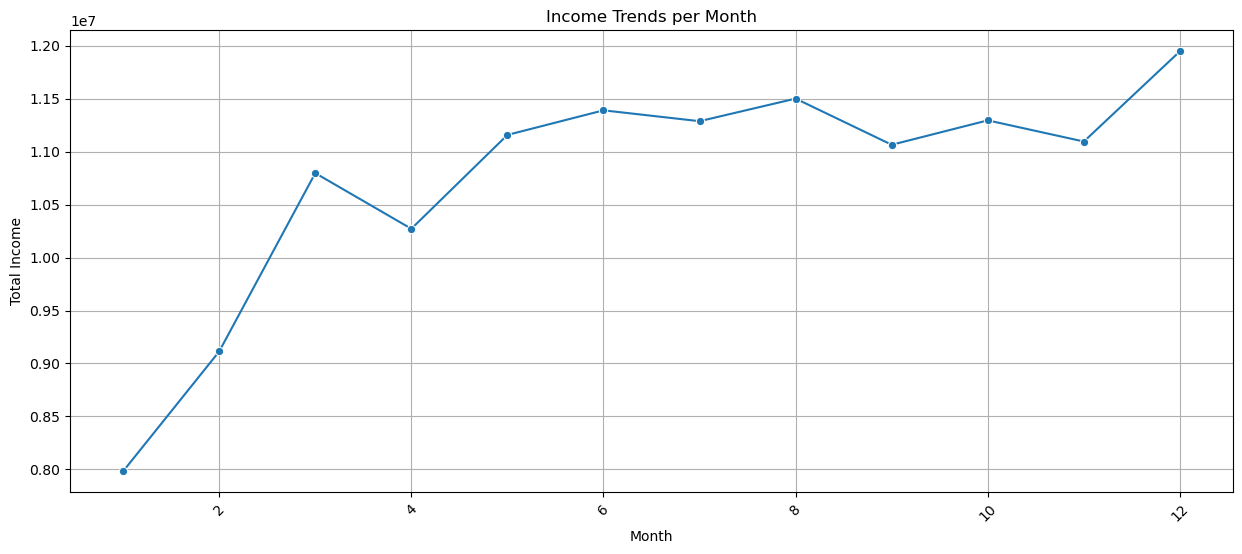

In [121]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren3, x='bulan_num', y='jumlah_pendapatan', marker='o')
plt.title('Income Trends per Month')
plt.xlabel('Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [123]:
df1g.head()

listing_id  tahun  bulan_num  pendapatan_per_bulan  median_price  \
0        3335   2016          2                 120.0         120.0   
1        3335   2016          3                3720.0         120.0   
2        3335   2016          4                3600.0         120.0   
3        3335   2016          5                3720.0         120.0   
4        3335   2016          6                3600.0         120.0   

   jumlah_customer  
0                1  
1               31  
2               30  
3               31  
4               30

In [125]:
df1_juni = df1[df1['bulan_num'] == 6]
df1_juni.head()

listing_id       date  bulan_num  tahun  pendapatan
797309        3335 2016-06-01          6   2016       120.0
797310        3335 2016-06-02          6   2016       120.0
797311        3335 2016-06-03          6   2016       120.0
797312        3335 2016-06-04          6   2016       120.0
797313        3335 2016-06-05          6   2016       120.0

In [127]:
df1_juni.describe()

listing_id                           date  bulan_num    tahun  \
count  7.724400e+04                          77244    77244.0  77244.0   
mean   5.170853e+06  2016-06-15 13:29:23.368028672        6.0   2016.0   
min    3.335000e+03            2016-06-01 00:00:00        6.0   2016.0   
25%    2.693137e+06            2016-06-08 00:00:00        6.0   2016.0   
50%    5.324459e+06            2016-06-16 00:00:00        6.0   2016.0   
75%    7.793293e+06            2016-06-23 00:00:00        6.0   2016.0   
max    1.034016e+07            2016-06-30 00:00:00        6.0   2016.0   
std    2.985627e+06                            NaN        0.0      0.0   

         pendapatan  
count  77244.000000  
mean     147.473137  
min       20.000000  
25%       76.000000  
50%      110.000000  
75%      175.000000  
max     1099.000000  
std      112.481803

In [129]:
df1_may = df1[df1['bulan_num'] == 5]
df1_juni.head()

listing_id       date  bulan_num  tahun  pendapatan
797309        3335 2016-06-01          6   2016       120.0
797310        3335 2016-06-02          6   2016       120.0
797311        3335 2016-06-03          6   2016       120.0
797312        3335 2016-06-04          6   2016       120.0
797313        3335 2016-06-05          6   2016       120.0

In [131]:
df1_may.describe()

listing_id                           date  bulan_num    tahun  \
count  7.997100e+04                          79971    79971.0  79971.0   
mean   5.234380e+06  2016-05-16 00:15:43.181903360        5.0   2016.0   
min    3.335000e+03            2016-05-01 00:00:00        5.0   2016.0   
25%    2.761092e+06            2016-05-08 00:00:00        5.0   2016.0   
50%    5.395530e+06            2016-05-16 00:00:00        5.0   2016.0   
75%    7.859909e+06            2016-05-24 00:00:00        5.0   2016.0   
max    1.034016e+07            2016-05-31 00:00:00        5.0   2016.0   
std    2.989867e+06                            NaN        0.0      0.0   

         pendapatan  
count  79971.000000  
mean     139.538183  
min       20.000000  
25%       75.000000  
50%      110.000000  
75%      169.000000  
max     1099.000000  
std      102.863280

In [133]:
df2_customer = df2[['listing_id','mean_income', 'mean_customer']]

In [135]:
df2_customer_terendah = df2_customer.sort_values(by='mean_customer', ascending=True)

In [137]:
df2_customer_terendah.head(10)

listing_id  mean_income  mean_customer
3717    10319529         49.0            1.0
3687    10210625         90.0            1.0
3562     9714078         89.0            1.0
3535     9636238        120.0            1.0
3604     9868607        325.0            1.0
1121     3819831         82.0            1.0
261       656909         64.0            1.0
3696    10235136         50.0            1.0
1786     5893969        117.5            1.5
1558     5041669        142.5            1.5

In [139]:
print(df2_customer_terendah.head(10).to_markdown())

|      |       listing_id |   mean_income |   mean_customer |
|-----:|-----------------:|--------------:|----------------:|
| 3717 |      1.03195e+07 |          49   |             1   |
| 3687 |      1.02106e+07 |          90   |             1   |
| 3562 |      9.71408e+06 |          89   |             1   |
| 3535 |      9.63624e+06 |         120   |             1   |
| 3604 |      9.86861e+06 |         325   |             1   |
| 1121 |      3.81983e+06 |          82   |             1   |
|  261 | 656909           |          64   |             1   |
| 3696 |      1.02351e+07 |          50   |             1   |
| 1786 |      5.89397e+06 |         117.5 |             1.5 |
| 1558 |      5.04167e+06 |         142.5 |             1.5 |


In [141]:
df2_customer_tertinggi = df2_customer.sort_values(by='mean_customer', ascending=False)

In [143]:
df2_customer_tertinggi.head()

listing_id  mean_income  mean_customer
970      3352685      6100.00          30.50
39         48319      6710.00          30.50
2681     7858454      4537.50          30.25
1952     6363765      5408.60          30.20
3143     8765219      3945.75          30.00

In [145]:
df2_pendapatan = df2[['listing_id','mean_income', 'mean_customer']]

In [147]:
df2_pendapatan_terendah = df2_pendapatan.sort_values(by='mean_income', ascending=True)

In [149]:
df2_pendapatan_terendah.head(10)

listing_id  mean_income  mean_customer
3717    10319529         49.0            1.0
3696    10235136         50.0            1.0
261       656909         64.0            1.0
2639     7798575         76.0            2.0
1121     3819831         82.0            1.0
3562     9714078         89.0            1.0
3687    10210625         90.0            1.0
207       458197         96.0            2.0
2775     8006745         97.5            1.5
205       458191         98.0            2.0

In [151]:
print(df2_pendapatan_terendah.head(10).to_markdown())

|      |       listing_id |   mean_income |   mean_customer |
|-----:|-----------------:|--------------:|----------------:|
| 3717 |      1.03195e+07 |          49   |             1   |
| 3696 |      1.02351e+07 |          50   |             1   |
|  261 | 656909           |          64   |             1   |
| 2639 |      7.79858e+06 |          76   |             2   |
| 1121 |      3.81983e+06 |          82   |             1   |
| 3562 |      9.71408e+06 |          89   |             1   |
| 3687 |      1.02106e+07 |          90   |             1   |
|  207 | 458197           |          96   |             2   |
| 2775 |      8.00674e+06 |          97.5 |             1.5 |
|  205 | 458191           |          98   |             2   |


In [153]:
df2_pendapatan_tertinggi = df2_pendapatan.sort_values(by='mean_income', ascending=False)

In [155]:
df2_pendapatan_tertinggi.head()

listing_id   mean_income  mean_customer
2602     7733192  27918.538462      27.615385
1498     4825073  27538.461538      27.538462
810      2720963  26673.076923      28.076923
1372     4464824  25347.538462      27.846154
961      3308979  23866.666667      18.333333

In [157]:
df2_rating = df2[['listing_id','mean_income', 'mean_customer','review_scores_rating']]

In [159]:
df2_rating_tertinggi =df2_rating.sort_values(by='review_scores_rating', ascending=False)

In [161]:
df2_rating_tertinggi.head(10)

listing_id   mean_income  mean_customer  review_scores_rating
3698    10248139    180.000000       8.500000                 100.0
2681     7858454   4537.500000      30.250000                 100.0
1046     3585592   4074.285714      26.285714                 100.0
1051     3604931  11346.923077      22.923077                 100.0
2705     7901318   2254.000000      23.000000                 100.0
2704     7900497   2210.000000      26.000000                 100.0
2702     7887651   2218.857143      25.000000                 100.0
2696     7875887   2504.230769      27.615385                 100.0
2692     7873208    684.583333      23.583333                 100.0
1079     3691288   3714.000000      22.153846                 100.0

In [163]:
df2_rating_terendah =df2_rating.sort_values(by='review_scores_rating', ascending=True)

In [165]:
df2_rating_terendah.head(10)

listing_id  mean_income  mean_customer  review_scores_rating
3329     9183838     2725.000      28.500000                  20.0
3022     8474294      702.000       8.000000                  40.0
3311     9151374     2905.000      27.666667                  40.0
3312     9151865     2160.000      22.000000                  40.0
1726     5639238     2970.000      27.000000                  40.0
1517     4892529     6543.125      25.375000                  53.0
1956     6370313     5540.250      22.250000                  55.0
3273     9075558      490.000      13.750000                  57.0
2601     7732071     2709.000      21.000000                  60.0
3138     8754180     3325.000      19.000000                  60.0

# STAGE 2

## Handling missing value and duplicate

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [171]:
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| mean_income                      |    0 |
| mean_customer                    |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [173]:
# Handling weekly_price and Monthly_price
df2['weekly_price'] = df2['weekly_price'].fillna(0)
df2['monthly_price'] = df2['monthly_price'].fillna(0)

# Handling review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, 
# review_scores_location,review_scores_value 
for col in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
    df2[col] = df2.groupby('room_type')[col].transform(lambda x: x.fillna(x.median()))

# Handling host_response_rate, host_acceptance_rate, bathrooms, bedrooms, beds with median
df2['host_response_rate'] = df2['host_response_rate'].fillna(df2['host_response_rate'].median())
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].median())
df2['bathrooms'] = df2['bathrooms'].fillna(df2['bathrooms'].median())
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].median())
df2['beds'] = df2['beds'].fillna(df2['beds'].median())

# Handling host_response_time, host_identity_verified, host_is_superhost, property_type with mode
df2['host_response_time'] = df2['host_response_time'].fillna(df2['host_response_time'].mode()[0])
df2['host_identity_verified'] = df2['host_identity_verified'].fillna(df2['host_identity_verified'].mode()[0])
df2['host_is_superhost'] = df2['host_is_superhost'].fillna(df2['host_is_superhost'].mode()[0])
df2['property_type'] = df2['property_type'].fillna(df2['property_type'].mode()[0])

In [175]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


Handling zipcode data cannot be done by relying on mean, median and mode data alone because the data is closely related to latitude and longitude, therefore we fill in the empty zipcode values ​​with the appropriate values. We use the Reverse Geocoding library

In [177]:
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to get zipcode from latitude and longitude
def get_zipcode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
    except:
        return None

# Fill in missing values ​​in zipcode
for index, row in df2[df2['zipcode'].isnull()].iterrows():
    zipcode = get_zipcode(row['latitude'], row['longitude'])
    if zipcode:
        df2.at[index, 'zipcode'] = zipcode

In [180]:
print(df2.isna().sum().to_markdown())

|                                  |   0 |
|:---------------------------------|----:|
| listing_id                       |   0 |
| mean_income                      |   0 |
| mean_customer                    |   0 |
| name                             |   0 |
| host_id                          |   0 |
| host_response_time               |   0 |
| host_response_rate               |   0 |
| host_acceptance_rate             |   0 |
| host_is_superhost                |   0 |
| host_identity_verified           |   0 |
| zipcode                          |   0 |
| latitude                         |   0 |
| longitude                        |   0 |
| is_location_exact                |   0 |
| property_type                    |   0 |
| room_type                        |   0 |
| accommodates                     |   0 |
| bathrooms                        |   0 |
| bedrooms                         |   0 |
| beds                             |   0 |
| bed_type                         |   0 |
| price    

## Handle Outlier & Feature Transformation

In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_response_rate                3723 non-null   float64
 7   host_acceptance_rate              3723 non-null   float64
 8   host_is_superhost                 3723 non-null   object 
 9   host_identity_verified            3723 non-null   object 
 10  zipcode                           3723 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [185]:
df2_without_id_2 = df2.drop(columns=['listing_id'])
nums2ver2 = df2_without_id_2.select_dtypes(include=['float64', 'int64'])

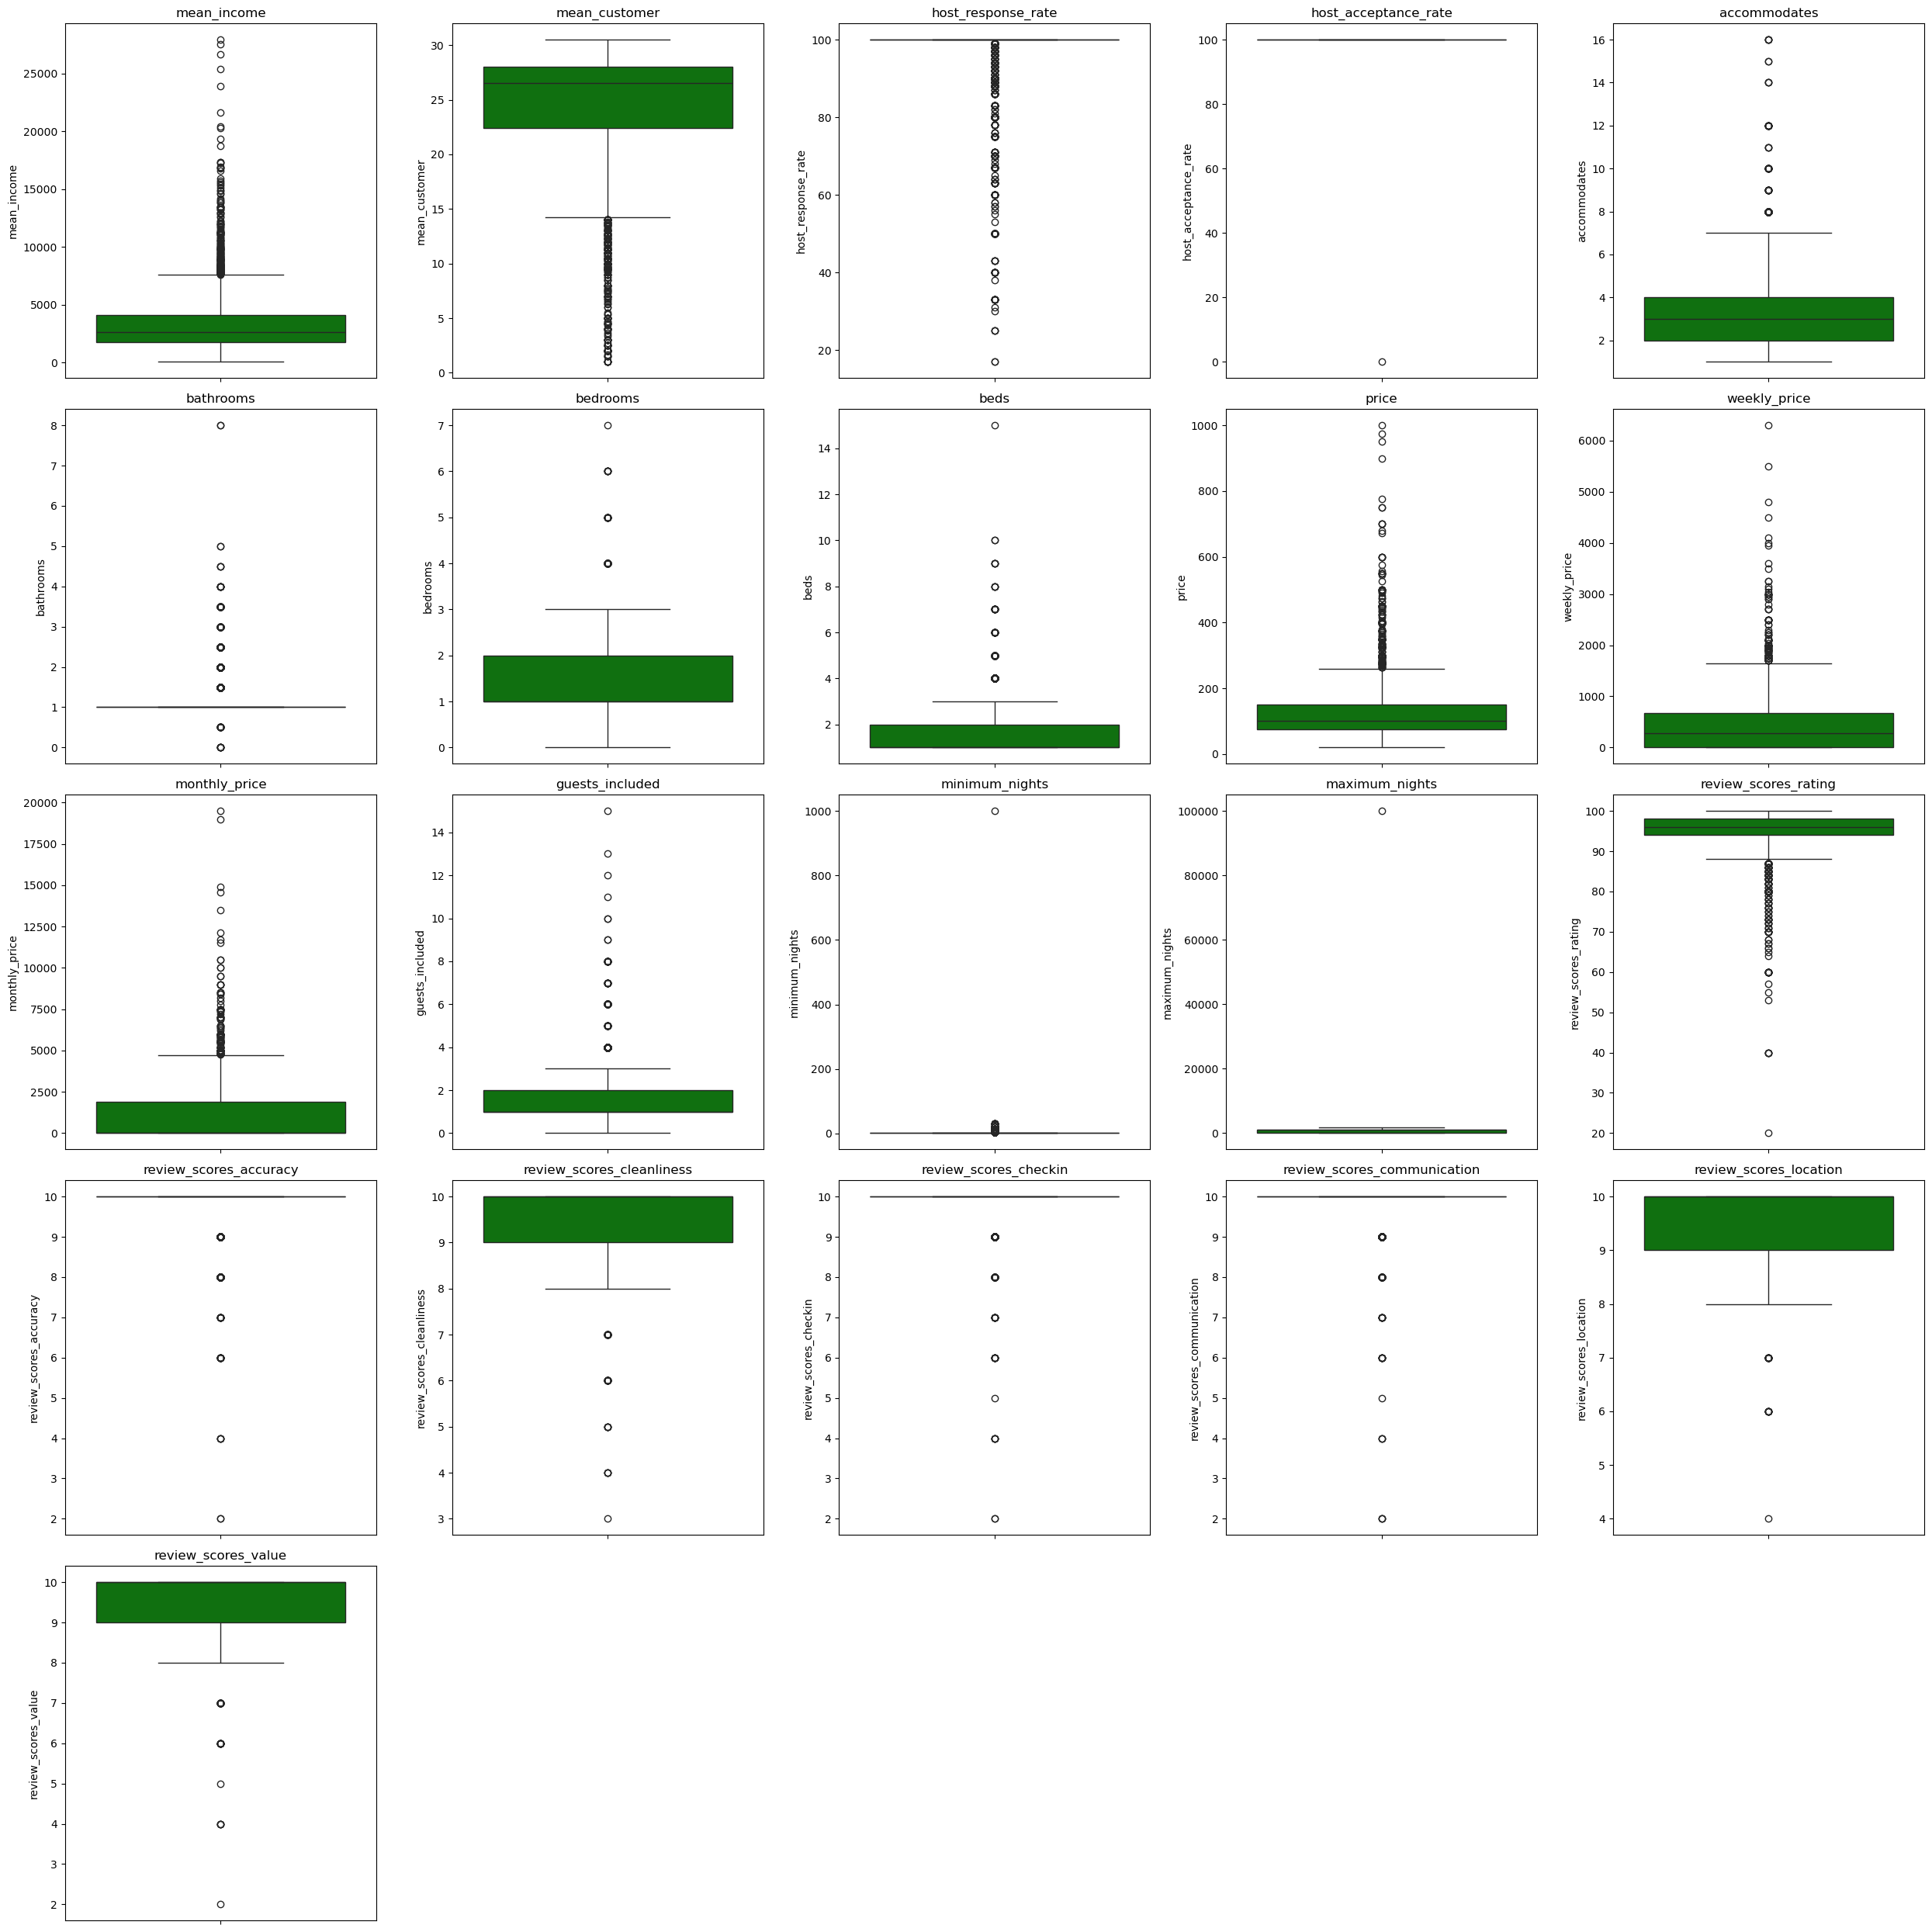

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(y=nums2ver2[col], color='green', orient='v')
    plt.title(col)

plt.tight_layout()
plt.show()

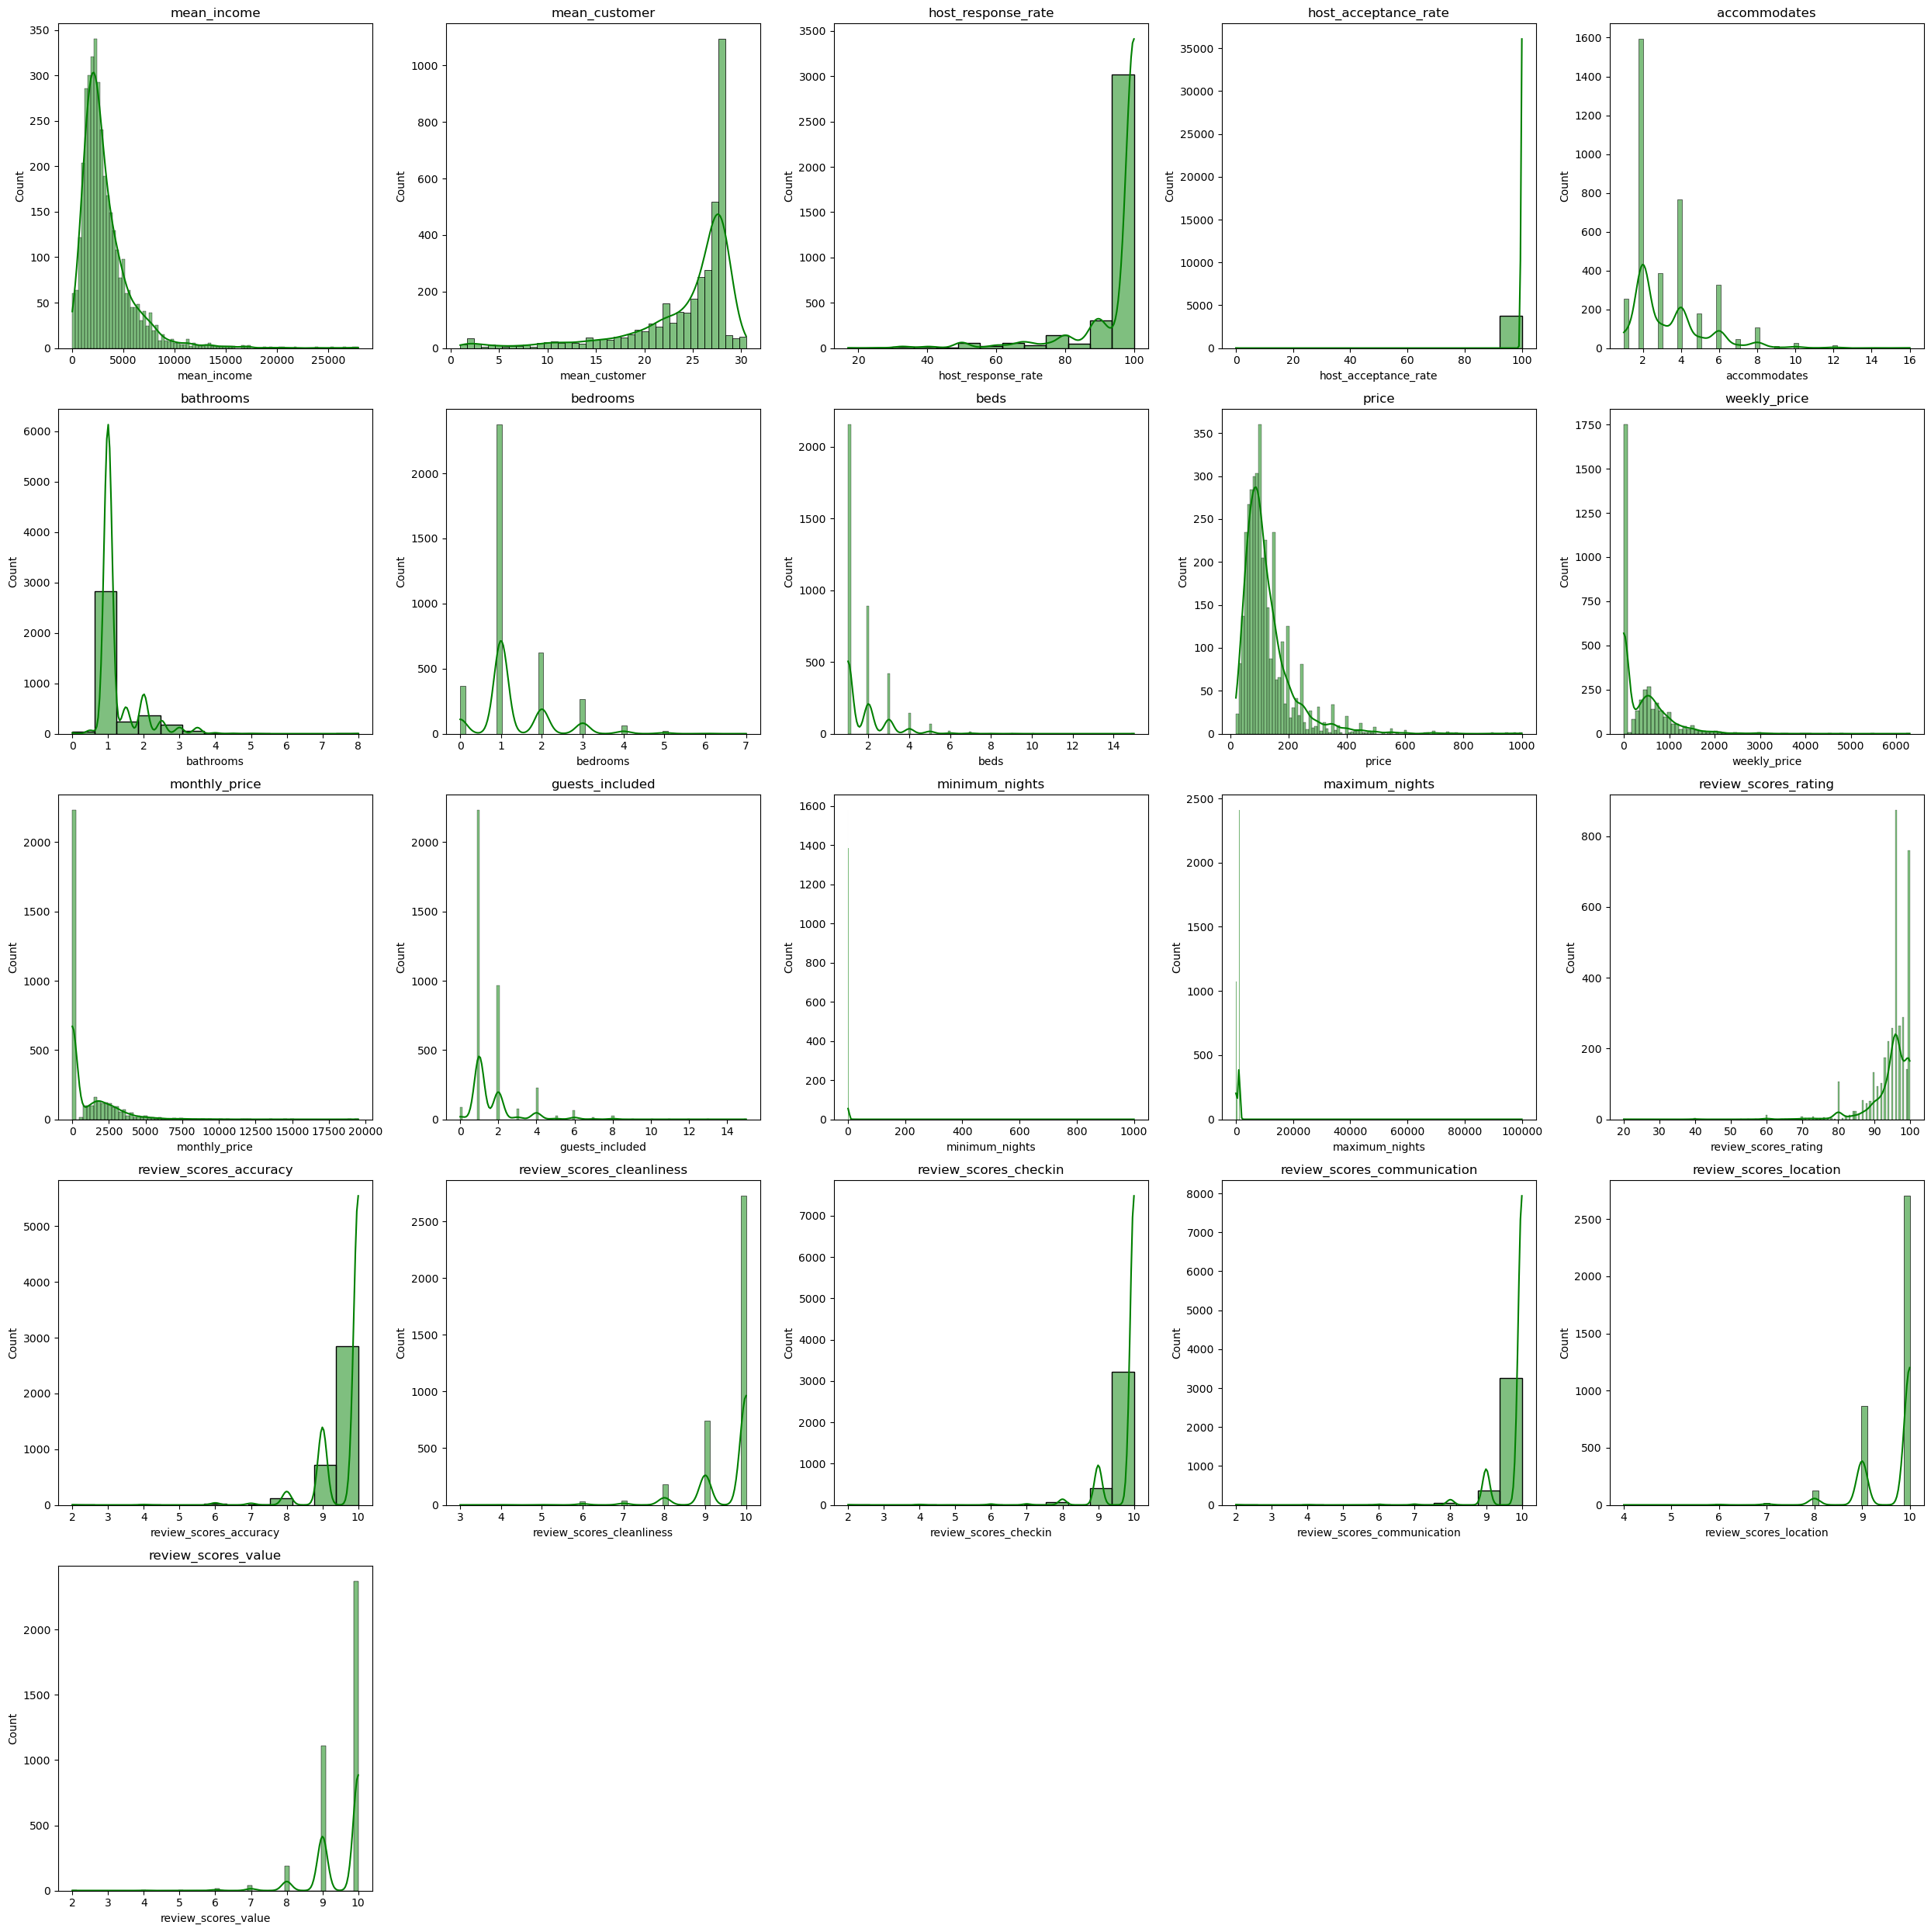

In [189]:
cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(data=nums2ver2, x=col, kde=True, color='green')
    plt.title(col)

plt.tight_layout()
plt.show()

In [191]:
# function to convert percentage scores into categories
def categorize_score(score):
    if 0 <= score <= 30:
        return 'Sangat Buruk'
    elif 31 <= score <= 60:
        return 'Buruk'
    elif 61 <= score <= 80:
        return 'Sedang'
    elif 81 <= score <= 90:
        return 'Baik'
    elif 91 <= score <= 100:
        return 'Sangat Baik'
    else:
        return 'Tidak Valid'

# 
df2['review_scores_rating_kategori'] = df2['review_scores_rating'].apply(categorize_score)
df2['host_response_rate_kategori'] = df2['host_response_rate'].apply(categorize_score)
df2['host_acceptance_rate_kategori'] = df2['host_acceptance_rate'].apply(categorize_score)

# 
print(df2[['review_scores_rating', 'review_scores_rating_kategori', 
           'host_response_rate', 'host_response_rate_kategori', 
           'host_acceptance_rate', 'host_acceptance_rate_kategori']].head())

   review_scores_rating review_scores_rating_kategori  host_response_rate  \
0                  96.0                   Sangat Baik                88.0   
1                  92.0                   Sangat Baik               100.0   
2                  96.0                   Sangat Baik               100.0   
3                  93.0                   Sangat Baik                90.0   
4                  94.0                   Sangat Baik               100.0   

  host_response_rate_kategori  host_acceptance_rate  \
0                        Baik                 100.0   
1                 Sangat Baik                 100.0   
2                 Sangat Baik                 100.0   
3                        Baik                 100.0   
4                 Sangat Baik                 100.0   

  host_acceptance_rate_kategori  
0                   Sangat Baik  
1                   Sangat Baik  
2                   Sangat Baik  
3                   Sangat Baik  
4                   Sangat Baik  


In [193]:
df2.drop(columns=['review_scores_rating', 'host_response_rate', 'host_acceptance_rate'], inplace=True)

In [195]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425      within an hour   

  host_is_superhost host_identity_verified zipcode           latitude  ...  \
0                 f                      t   98118  47.52984647440817  ...   
1                 f                      t   98115  47.68725100864705  ...   
2                 f                      t   98106  47.52397950434662  ...   
3                 f                      t   98103   47.6541086069472  ...   
4                 f                      f   98122  47.61539737810128  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        10.0                   10.0                10.0   
1                         9.0                    9.0                 9.0   
2                        10.0                    9.0                10.0   
3                         9.0                   10.0                 9.0   
4                        10.0                   10.0                 9.0   

  instant_bookable  cancellation_policy  require_guest_profile_picture  \
0                f               strict                              f   
1                f             moderate                              f   
2                t               strict                              f   
3                f               strict                              f   
4                f             flexible                              f   

   require_guest_phone_verification  review_scores_rating_kategori  \
0                                 f                    Sangat Baik   
1                                 f                    Sangat Baik   
2                                 t                    Sangat Baik   
3                                 f                    Sangat Baik   
4                                 f                    Sangat Baik   

  host_response_rate_kategori  host_acceptance_rate_kategori  
0                        Baik                    Sangat Baik  
1                 Sangat Baik                    Sangat Baik  
2                 Sangat Baik                    Sangat Baik  
3                        Baik                    Sangat Baik  
4                 Sangat Baik                    Sangat Baik  

[5 rows x 38 columns]

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [199]:
# List of columns to log transform
log_columns = [
    'accommodates', 'bathrooms', 'bedrooms', 
    'beds', 'price', 'weekly_price', 'monthly_price', 
    'guests_included', 'minimum_nights', 'maximum_nights'
]

# Apply log transformation to the selected columns
for col in log_columns:
    df2[col + '_log'] = np.log(df2[col] + 1)  # Adding 1 to avoid log(0)

In [201]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425      within an hour   

  host_is_superhost host_identity_verified zipcode           latitude  ...  \
0                 f                      t   98118  47.52984647440817  ...   
1                 f                      t   98115  47.68725100864705  ...   
2                 f                      t   98106  47.52397950434662  ...   
3                 f                      t   98103   47.6541086069472  ...   
4                 f                      f   98122  47.61539737810128  ...   

  accommodates_log bathrooms_log bedrooms_log  beds_log  price_log  \
0         1.609438      0.693147     1.098612  1.098612   4.795791   
1         1.098612      0.693147     0.693147  0.693147   4.418841   
2         1.098612      0.693147     0.693147  0.693147   3.891820   
3         1.098612      0.693147     0.693147  0.693147   4.510860   
4         1.098612      0.693147     0.693147  0.693147   4.454347   

   weekly_price_log  monthly_price_log  guests_included_log  \
0          6.311735           7.378384             1.098612   
1          6.265301           7.563201             0.693147   
2          5.929589           7.131699             0.693147   
3          6.508769           0.000000             1.098612   
4          0.000000           0.000000             0.693147   

  minimum_nights_log  maximum_nights_log  
0           1.098612            6.594413  
1           1.098612            4.110874  
2           1.386294            3.367296  
3           1.098612            7.026427  
4           0.693147            7.026427  

[5 rows x 48 columns]

In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [205]:
df2.drop(columns=log_columns, inplace=True)

In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [209]:
df2['weekly_price_log'] = df2['weekly_price_log'].fillna(0)
df2['monthly_price_log'] = df2['monthly_price_log'].fillna(0)

In [211]:
df2_without_id_2 = df2.drop(columns=['listing_id'])
nums2ver2 = df2_without_id_2.select_dtypes(include=['float64', 'int64'])

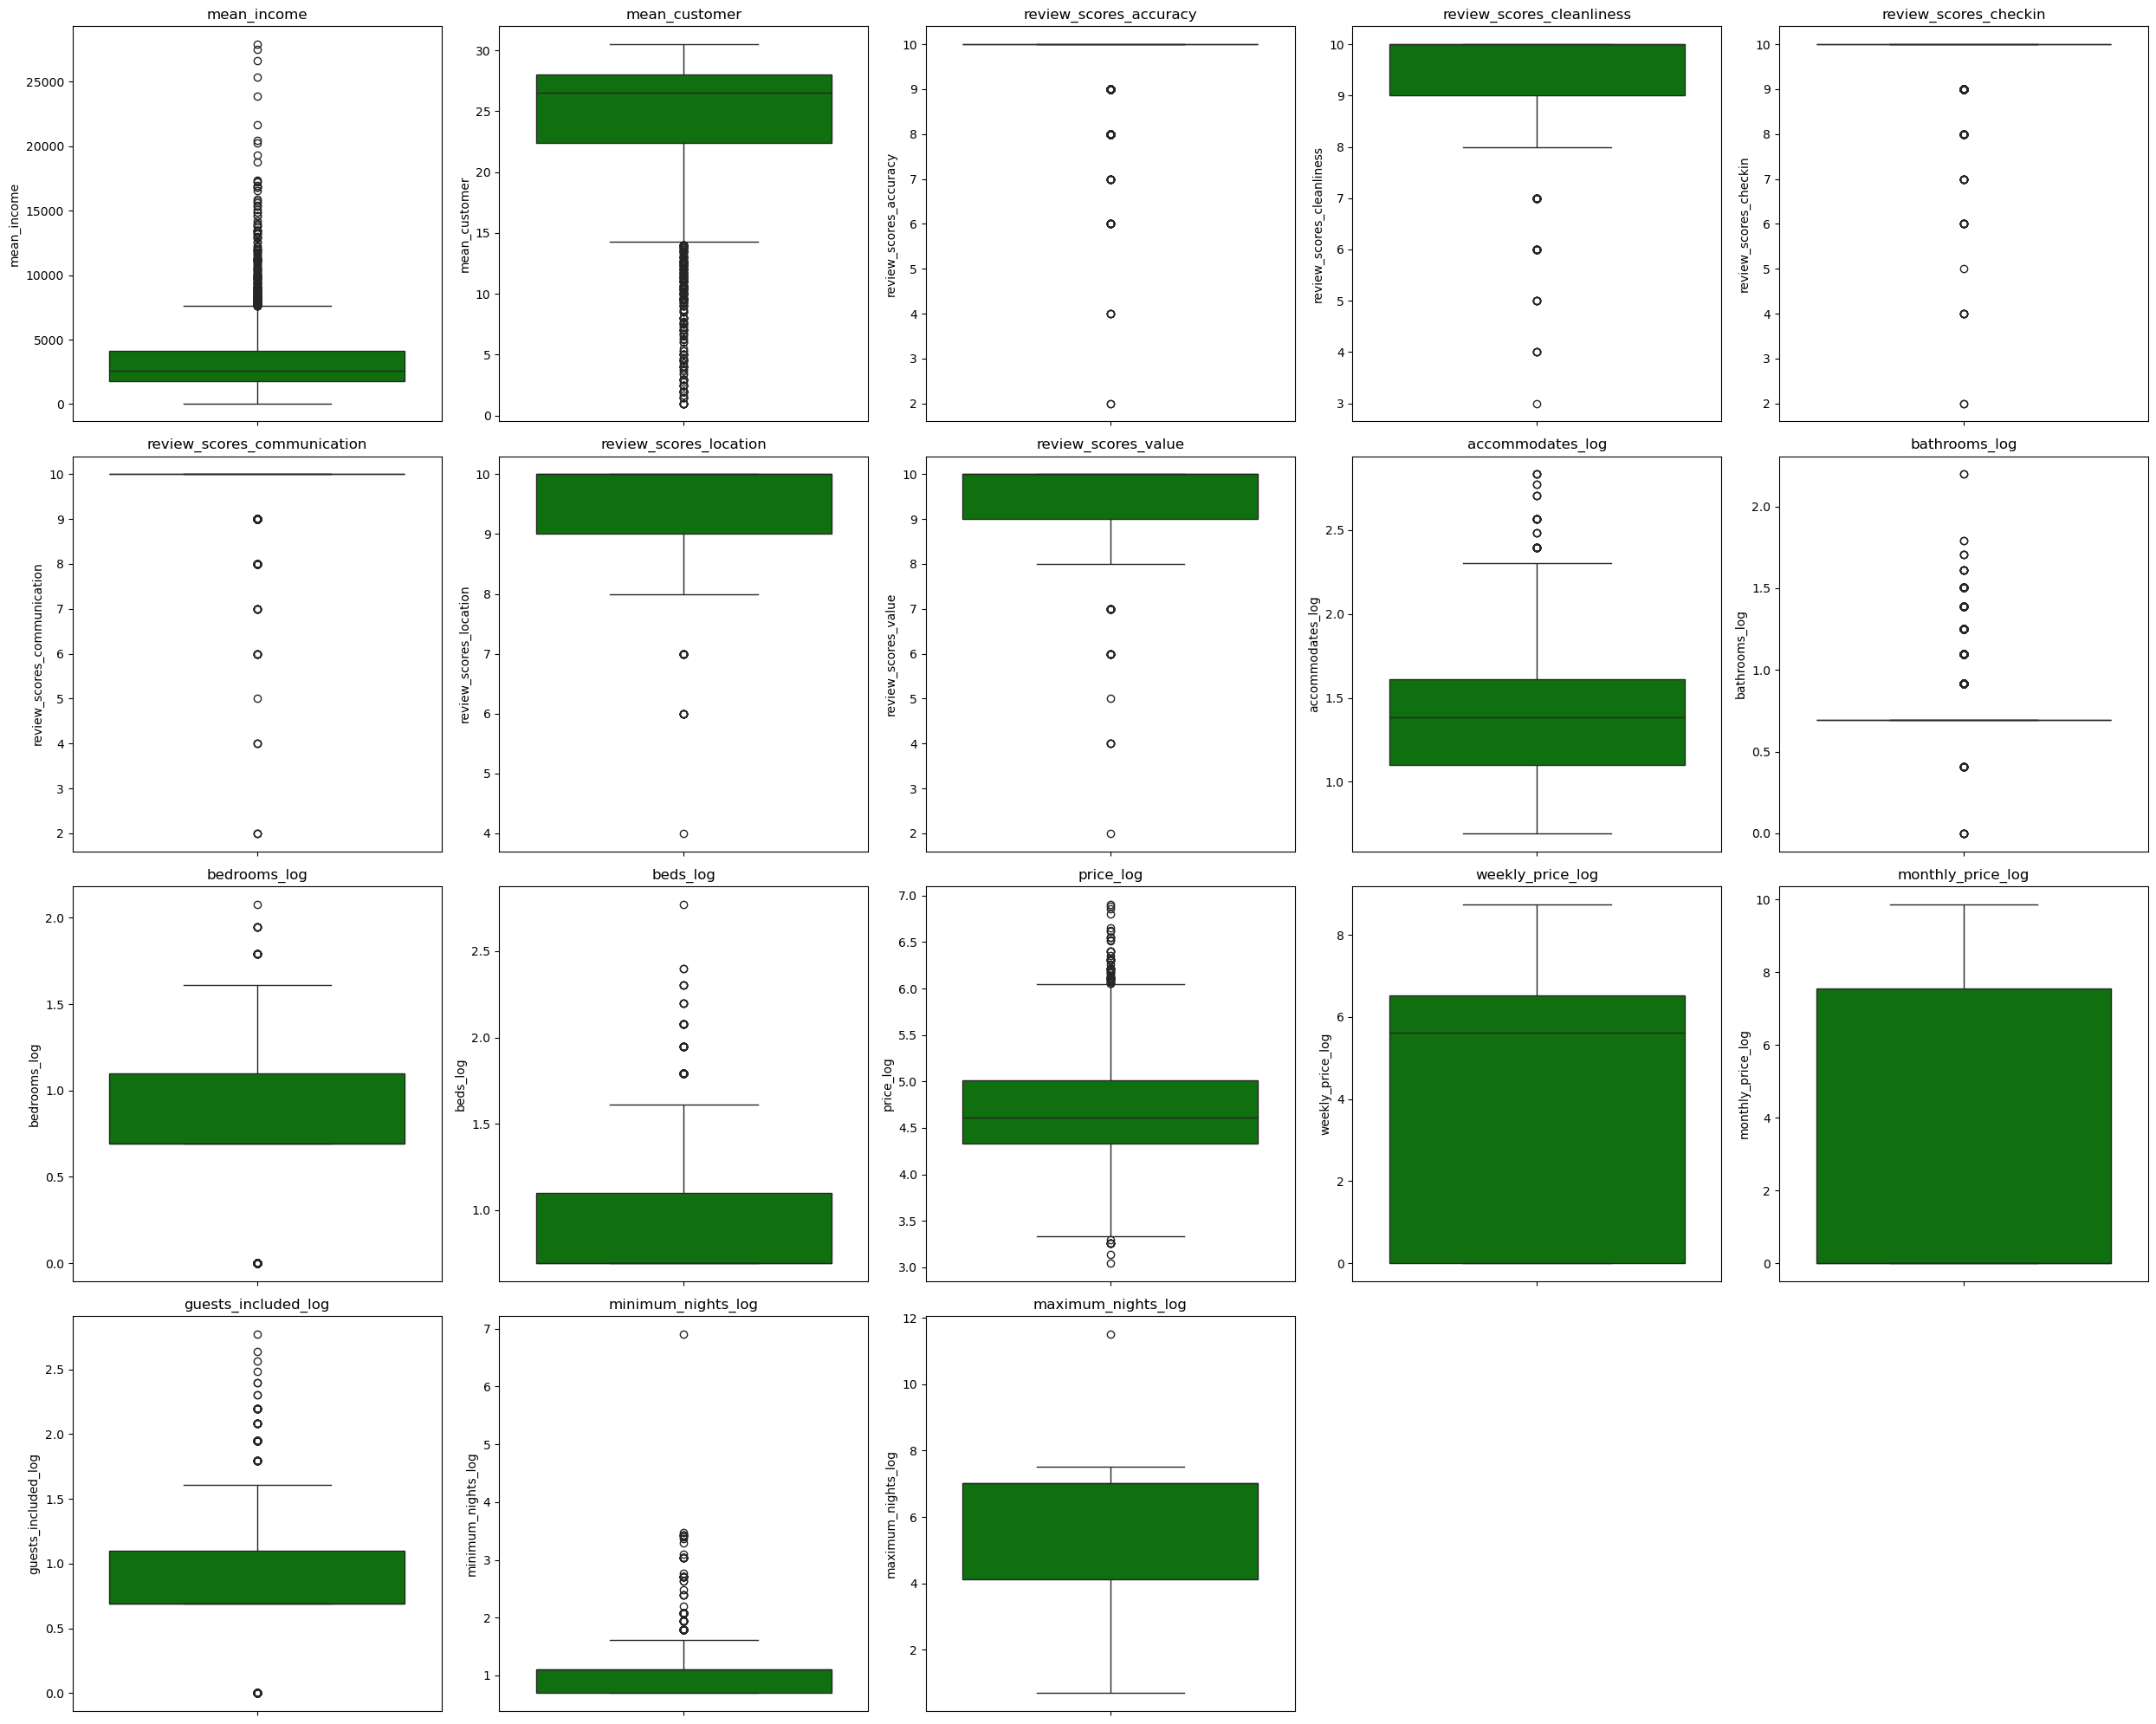

In [213]:
cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(y=nums2ver2[col], color='green', orient='v')
    plt.title(col)

plt.tight_layout()
plt.show()

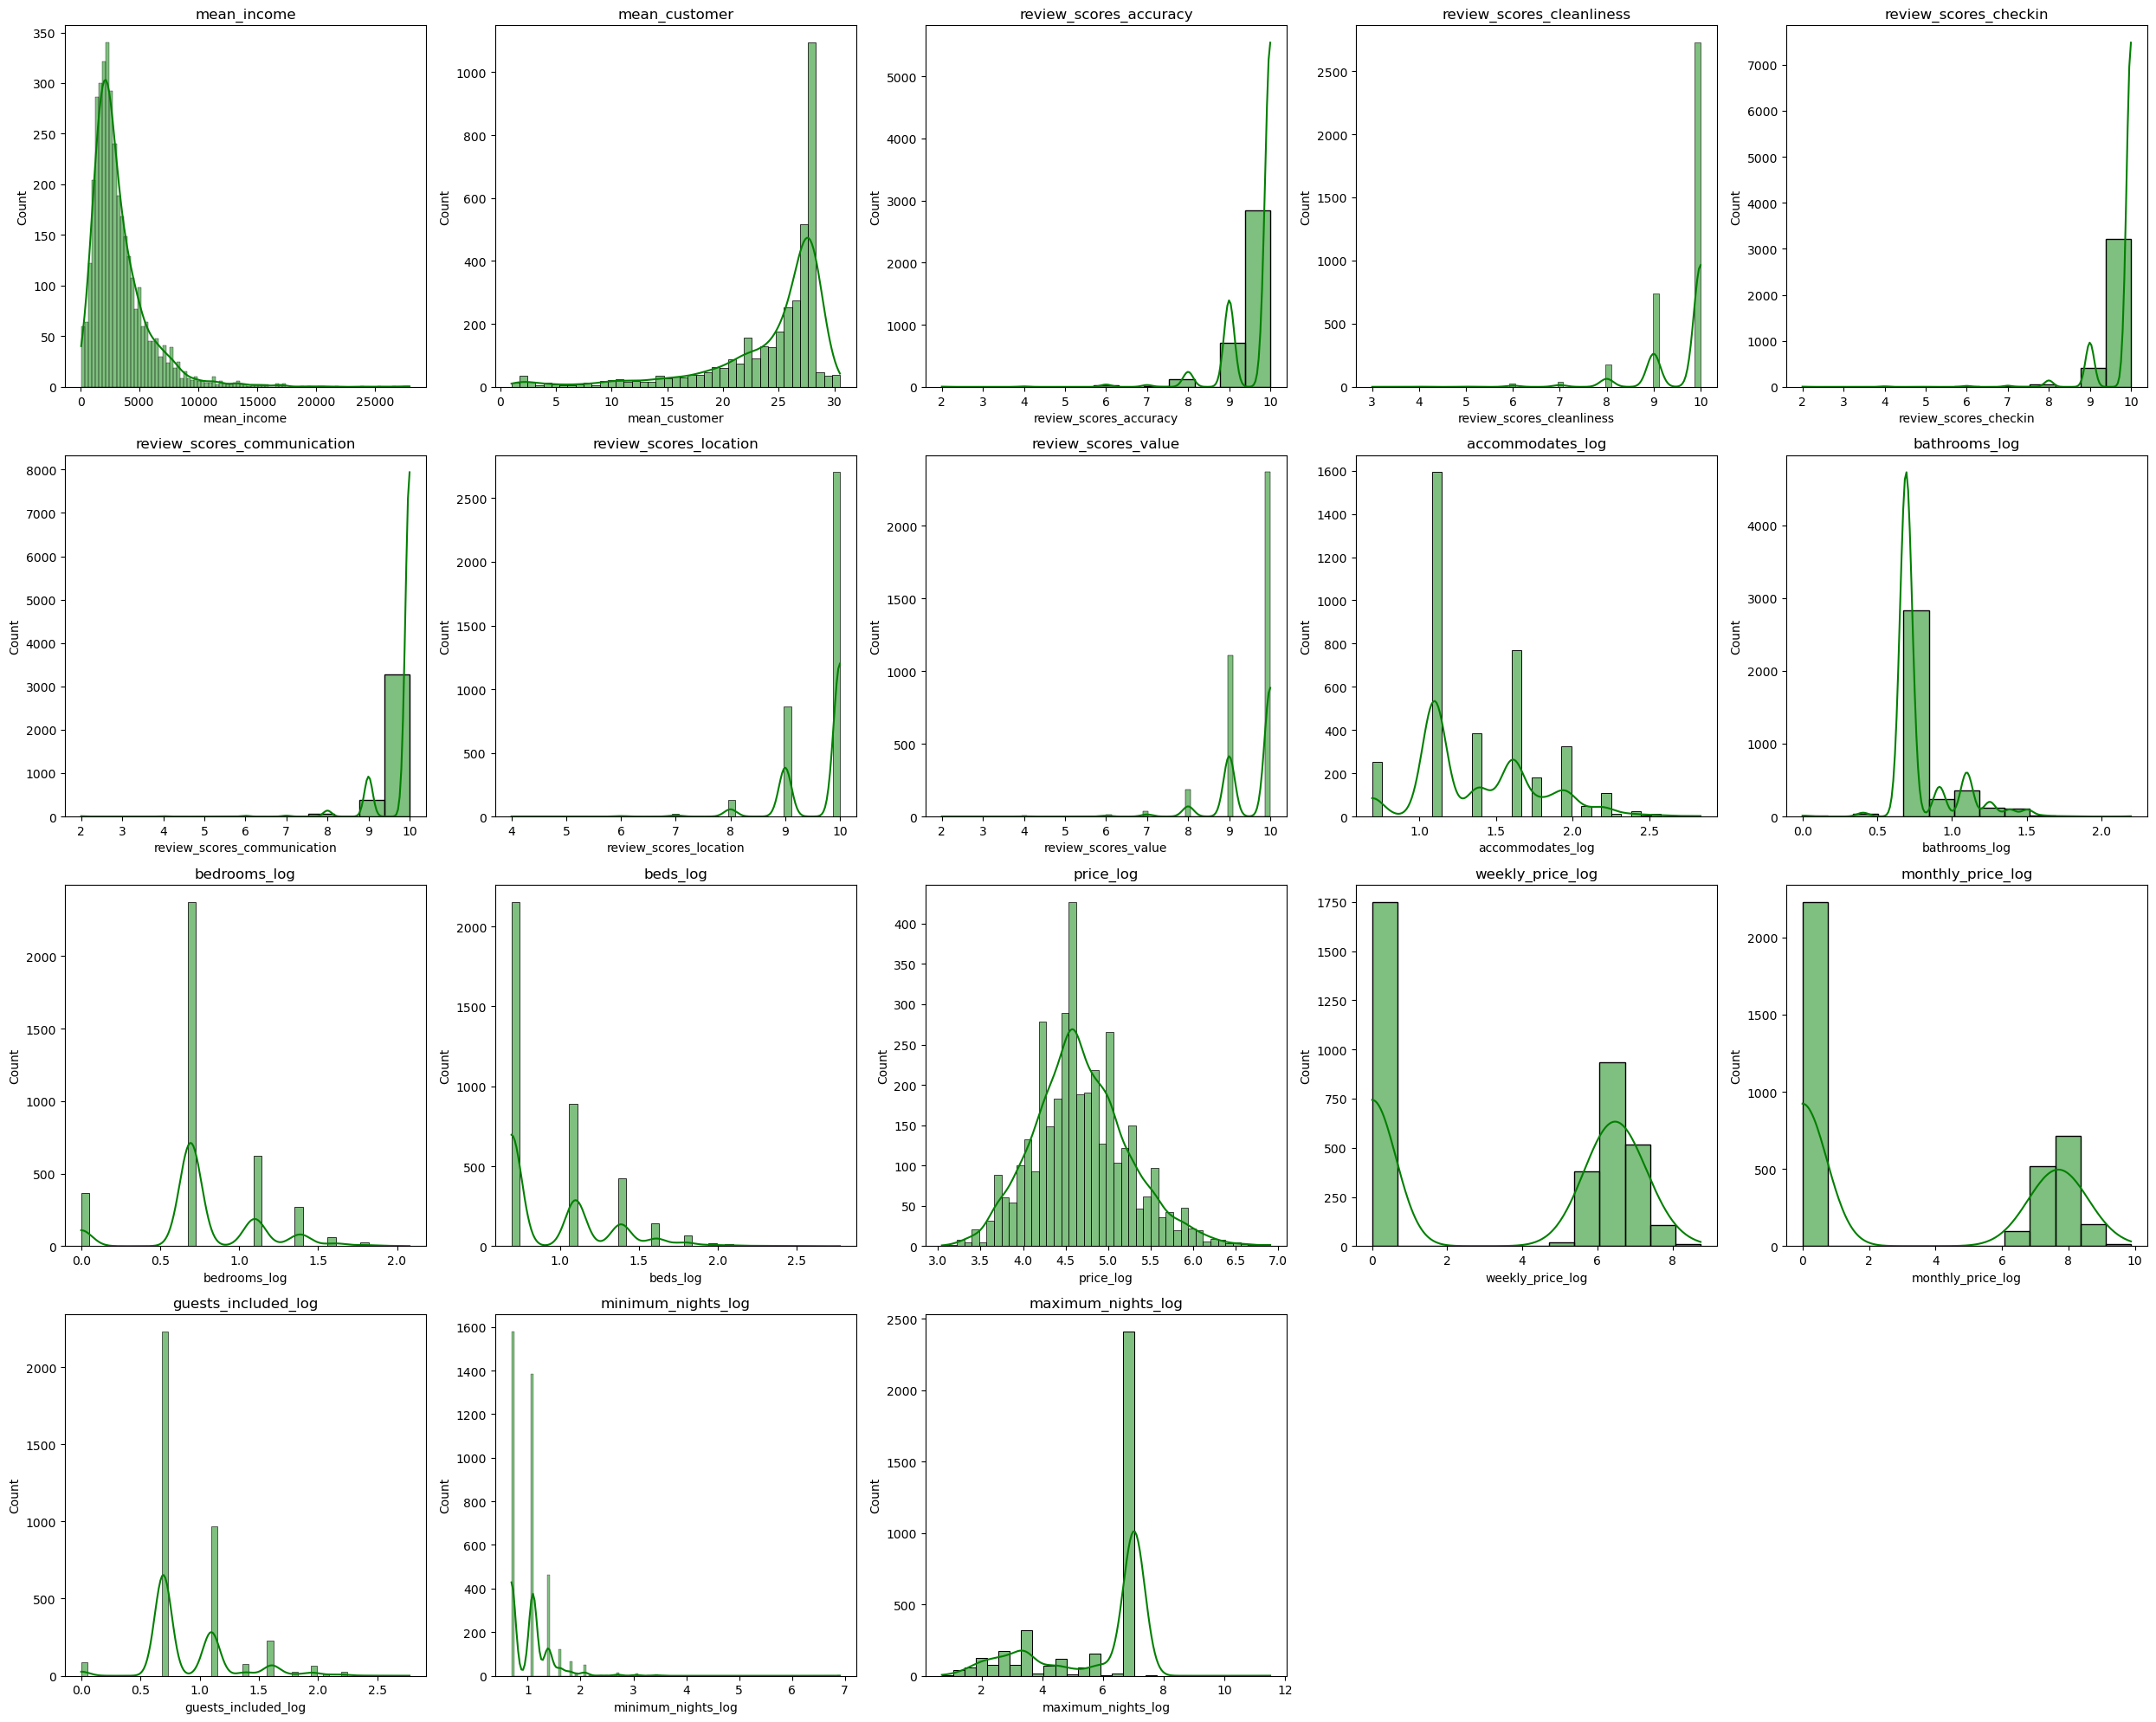

In [215]:
cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(data=nums2ver2, x=col, kde=True, color='green')
    plt.title(col)

plt.tight_layout()
plt.show()

# Feature Encoding

In [218]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for nominal categorical columns
nominal_columns = ['host_response_time', 'host_is_superhost', 'host_identity_verified', 
                  'is_location_exact', 'property_type', 'room_type', 'bed_type', 
                  'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
                  'require_guest_phone_verification']

# Looping to perform One-Hot Encoding
for column in nominal_columns:
    # Dummy variables
    dummies = pd.get_dummies(df2[column], prefix=column, drop_first=True)  
    # Combine dummy variables
    df2 = pd.concat([df2, dummies], axis=1)
    # Delete original coloumns
    df2.drop(columns=[column], inplace=True)

In [220]:
# Label Encoding for ordinal categorical columns
ordinal_columns = ['review_scores_rating_kategori', 'host_response_rate_kategori', 'host_acceptance_rate_kategori']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Looping to do Label Encoding
for column in ordinal_columns:
    # Fit dan transform data
    df2[column] = label_encoder.fit_transform(df2[column])

In [222]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
name                                     0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_cleanliness                0
review_scores_checkin                    0
review_scores_communication              0
review_scores_location                   0
review_scores_value                      0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
accommodates_log                         0
bathrooms_log                            0
bedrooms_log                             0
beds_log                                 0
price_log                                0
weekly_price_log                         0
monthly_pri

In [224]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   name                                   3723 non-null   object 
 4   host_id                                3723 non-null   object 
 5   zipcode                                3723 non-null   object 
 6   latitude                               3723 non-null   object 
 7   longitude                              3723 non-null   object 
 8   review_scores_accuracy                 3723 non-null   float64
 9   review_scores_cleanliness              3723 non-null   float64
 10  review_scores_checkin                  3723 non-null   float64
 11  revi

# FEATURE SELECTION

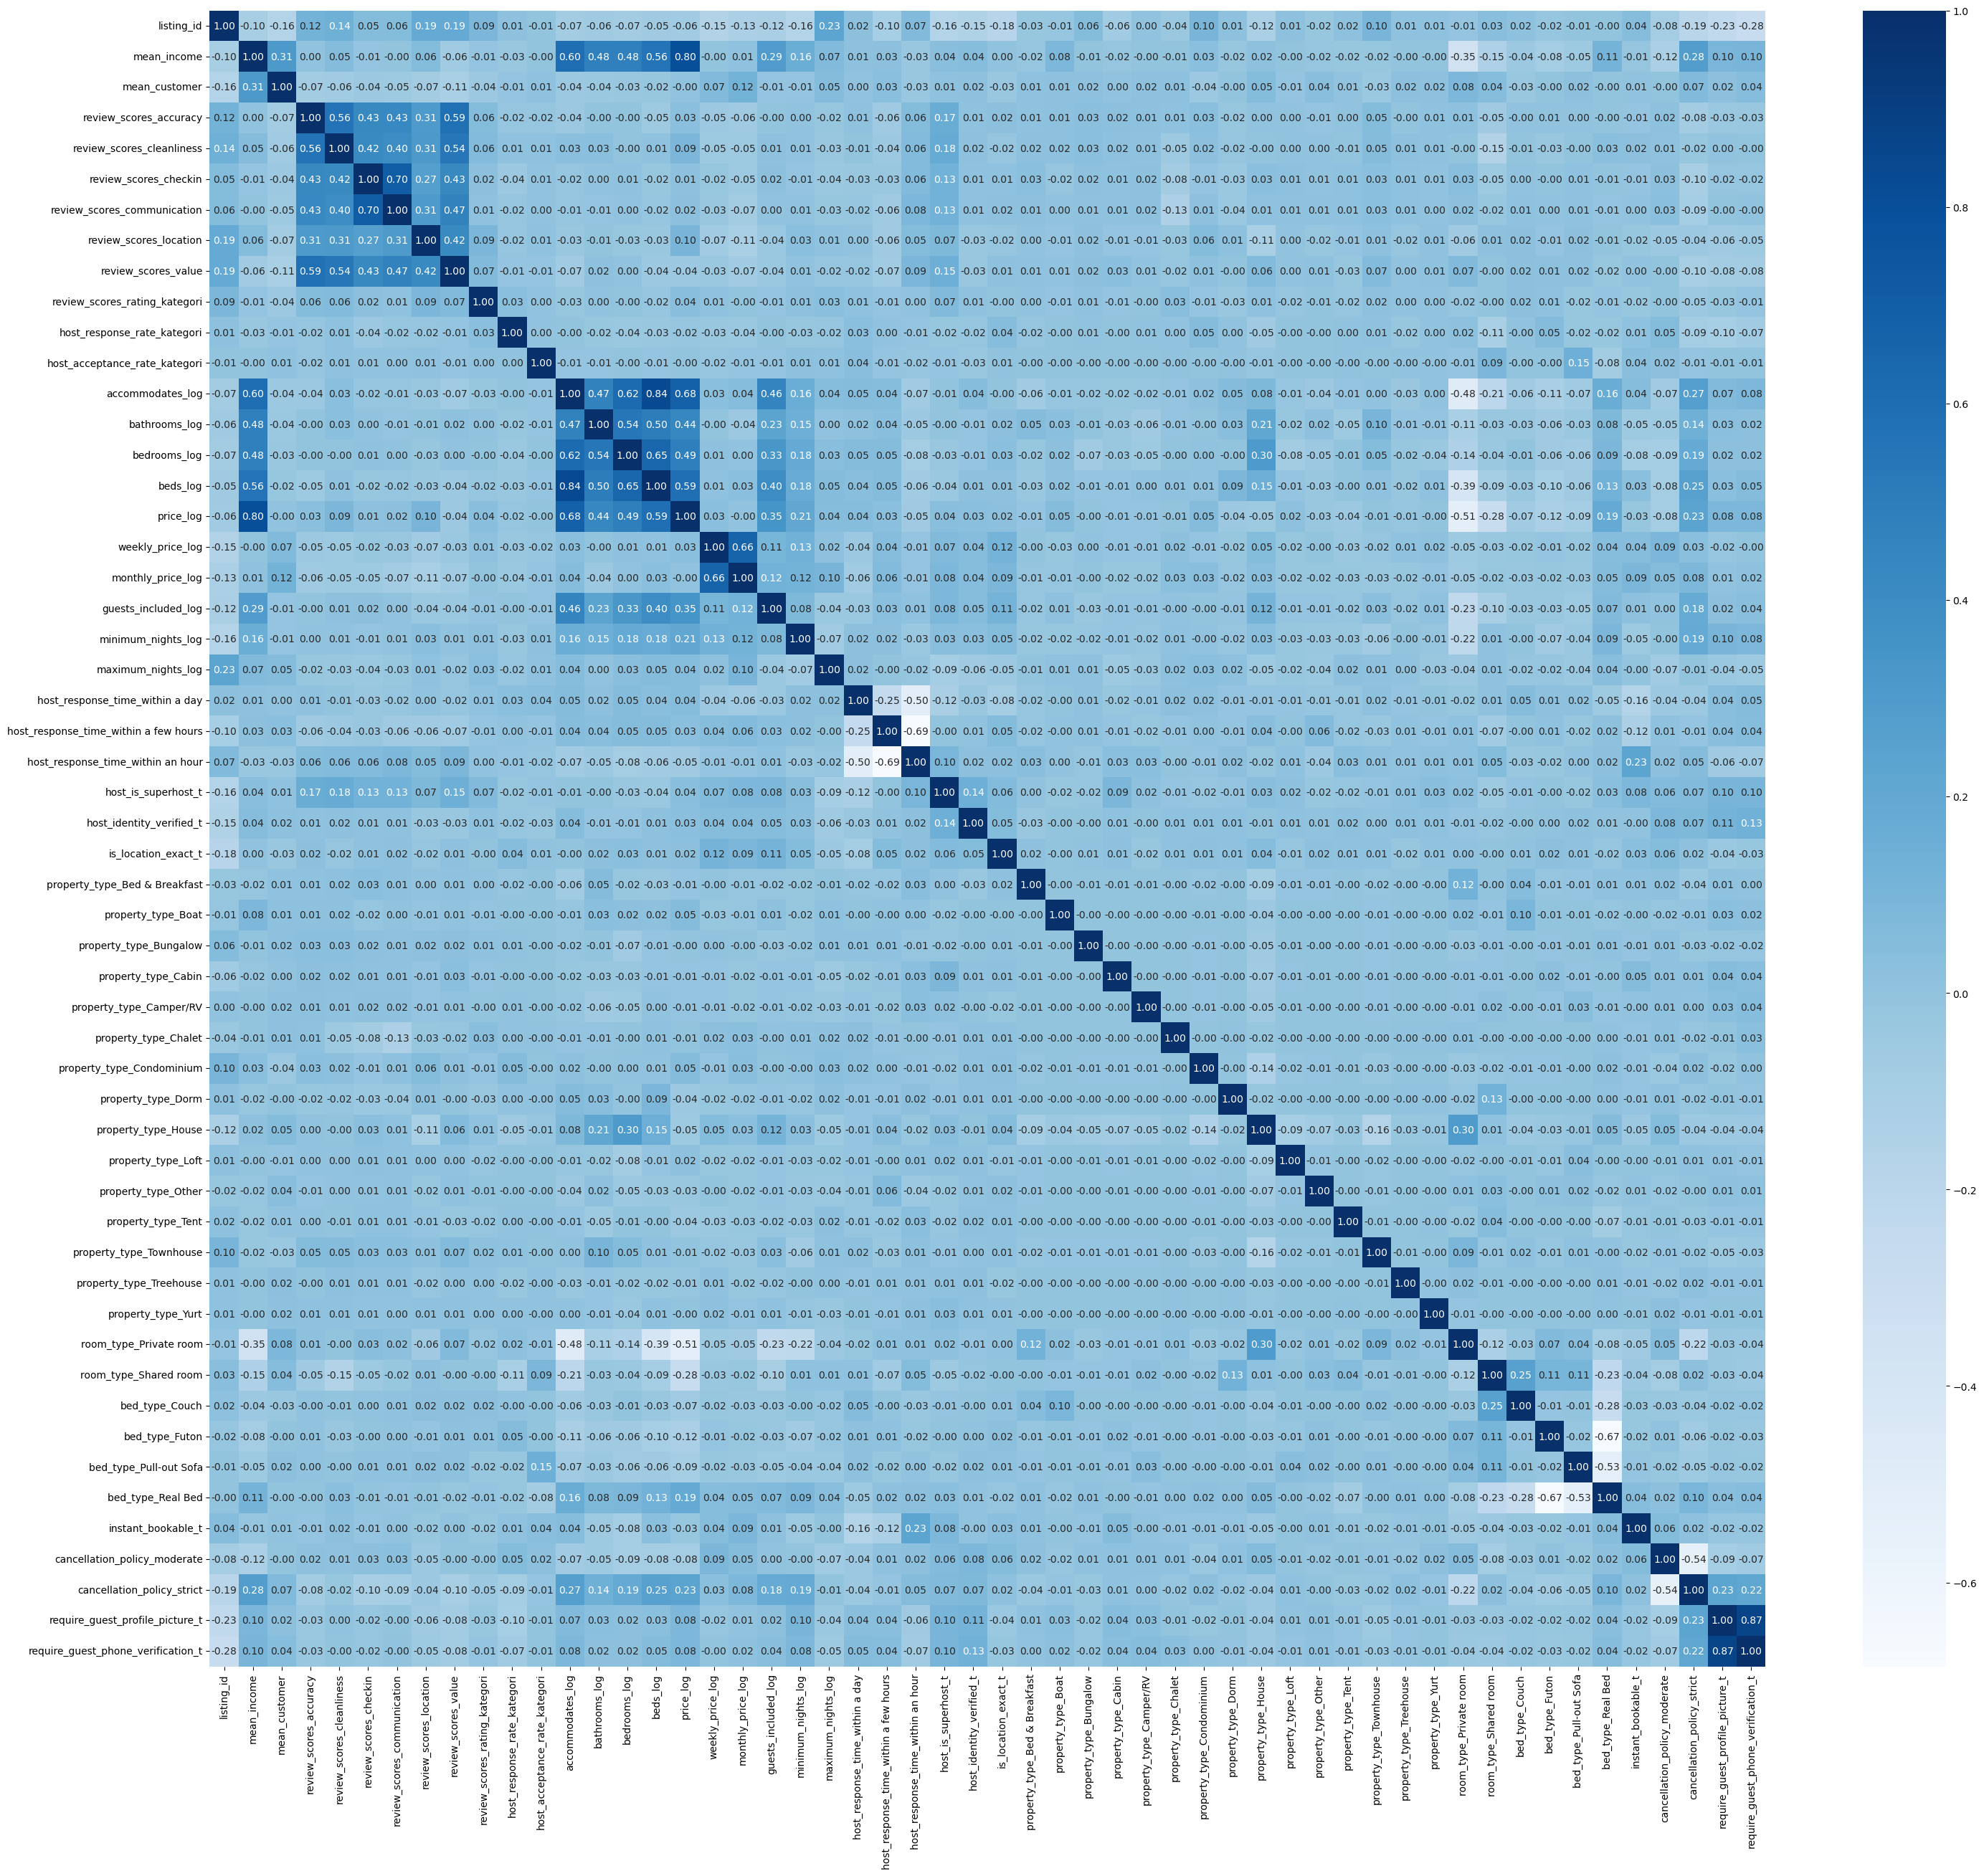

In [227]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**DROP Feature**

In [230]:
feature_to_drop =['accommodates_log']

# Drop features from DataFrame
df2 = df2.drop(columns = feature_to_drop)

print(f"Fitur yang di-drop: {feature_to_drop}")
print(df2.head())

Fitur yang di-drop: ['accommodates_log']
   listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id zipcode           latitude  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193   98118  47.52984647440817   
1      Sunrise in Seattle Master Suite   35749   98115  47.68725100864705   
2  Cozy Studio, min. to downtown -WiFi    8993   98106  47.52397950434662   
3  Fab, private seattle urban cottage!   14942   98103   47.6541086069472   
4             launchingpad/landingpad    19425   98122  47.61539737810128   

             longitude  review_scores_accuracy  review_scores_cleanliness  \
0    -122.275839521958                    10.0                       10.0   
1    -122.313130273865                    10.0                        9

**Check duplicates**

In [233]:
df2.duplicated().sum()

0

**Check NaN**

In [236]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
name                                     0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_cleanliness                0
review_scores_checkin                    0
review_scores_communication              0
review_scores_location                   0
review_scores_value                      0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
bathrooms_log                            0
bedrooms_log                             0
beds_log                                 0
price_log                                0
weekly_price_log                         0
monthly_price_log                        0
guests_incl

In [238]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   name                                   3723 non-null   object 
 4   host_id                                3723 non-null   object 
 5   zipcode                                3723 non-null   object 
 6   latitude                               3723 non-null   object 
 7   longitude                              3723 non-null   object 
 8   review_scores_accuracy                 3723 non-null   float64
 9   review_scores_cleanliness              3723 non-null   float64
 10  review_scores_checkin                  3723 non-null   float64
 11  revi

In [240]:
df2 = df2.drop(columns=['name'])

In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   host_id                                3723 non-null   object 
 4   zipcode                                3723 non-null   object 
 5   latitude                               3723 non-null   object 
 6   longitude                              3723 non-null   object 
 7   review_scores_accuracy                 3723 non-null   float64
 8   review_scores_cleanliness              3723 non-null   float64
 9   review_scores_checkin                  3723 non-null   float64
 10  review_scores_communication            3723 non-null   float64
 11  revi

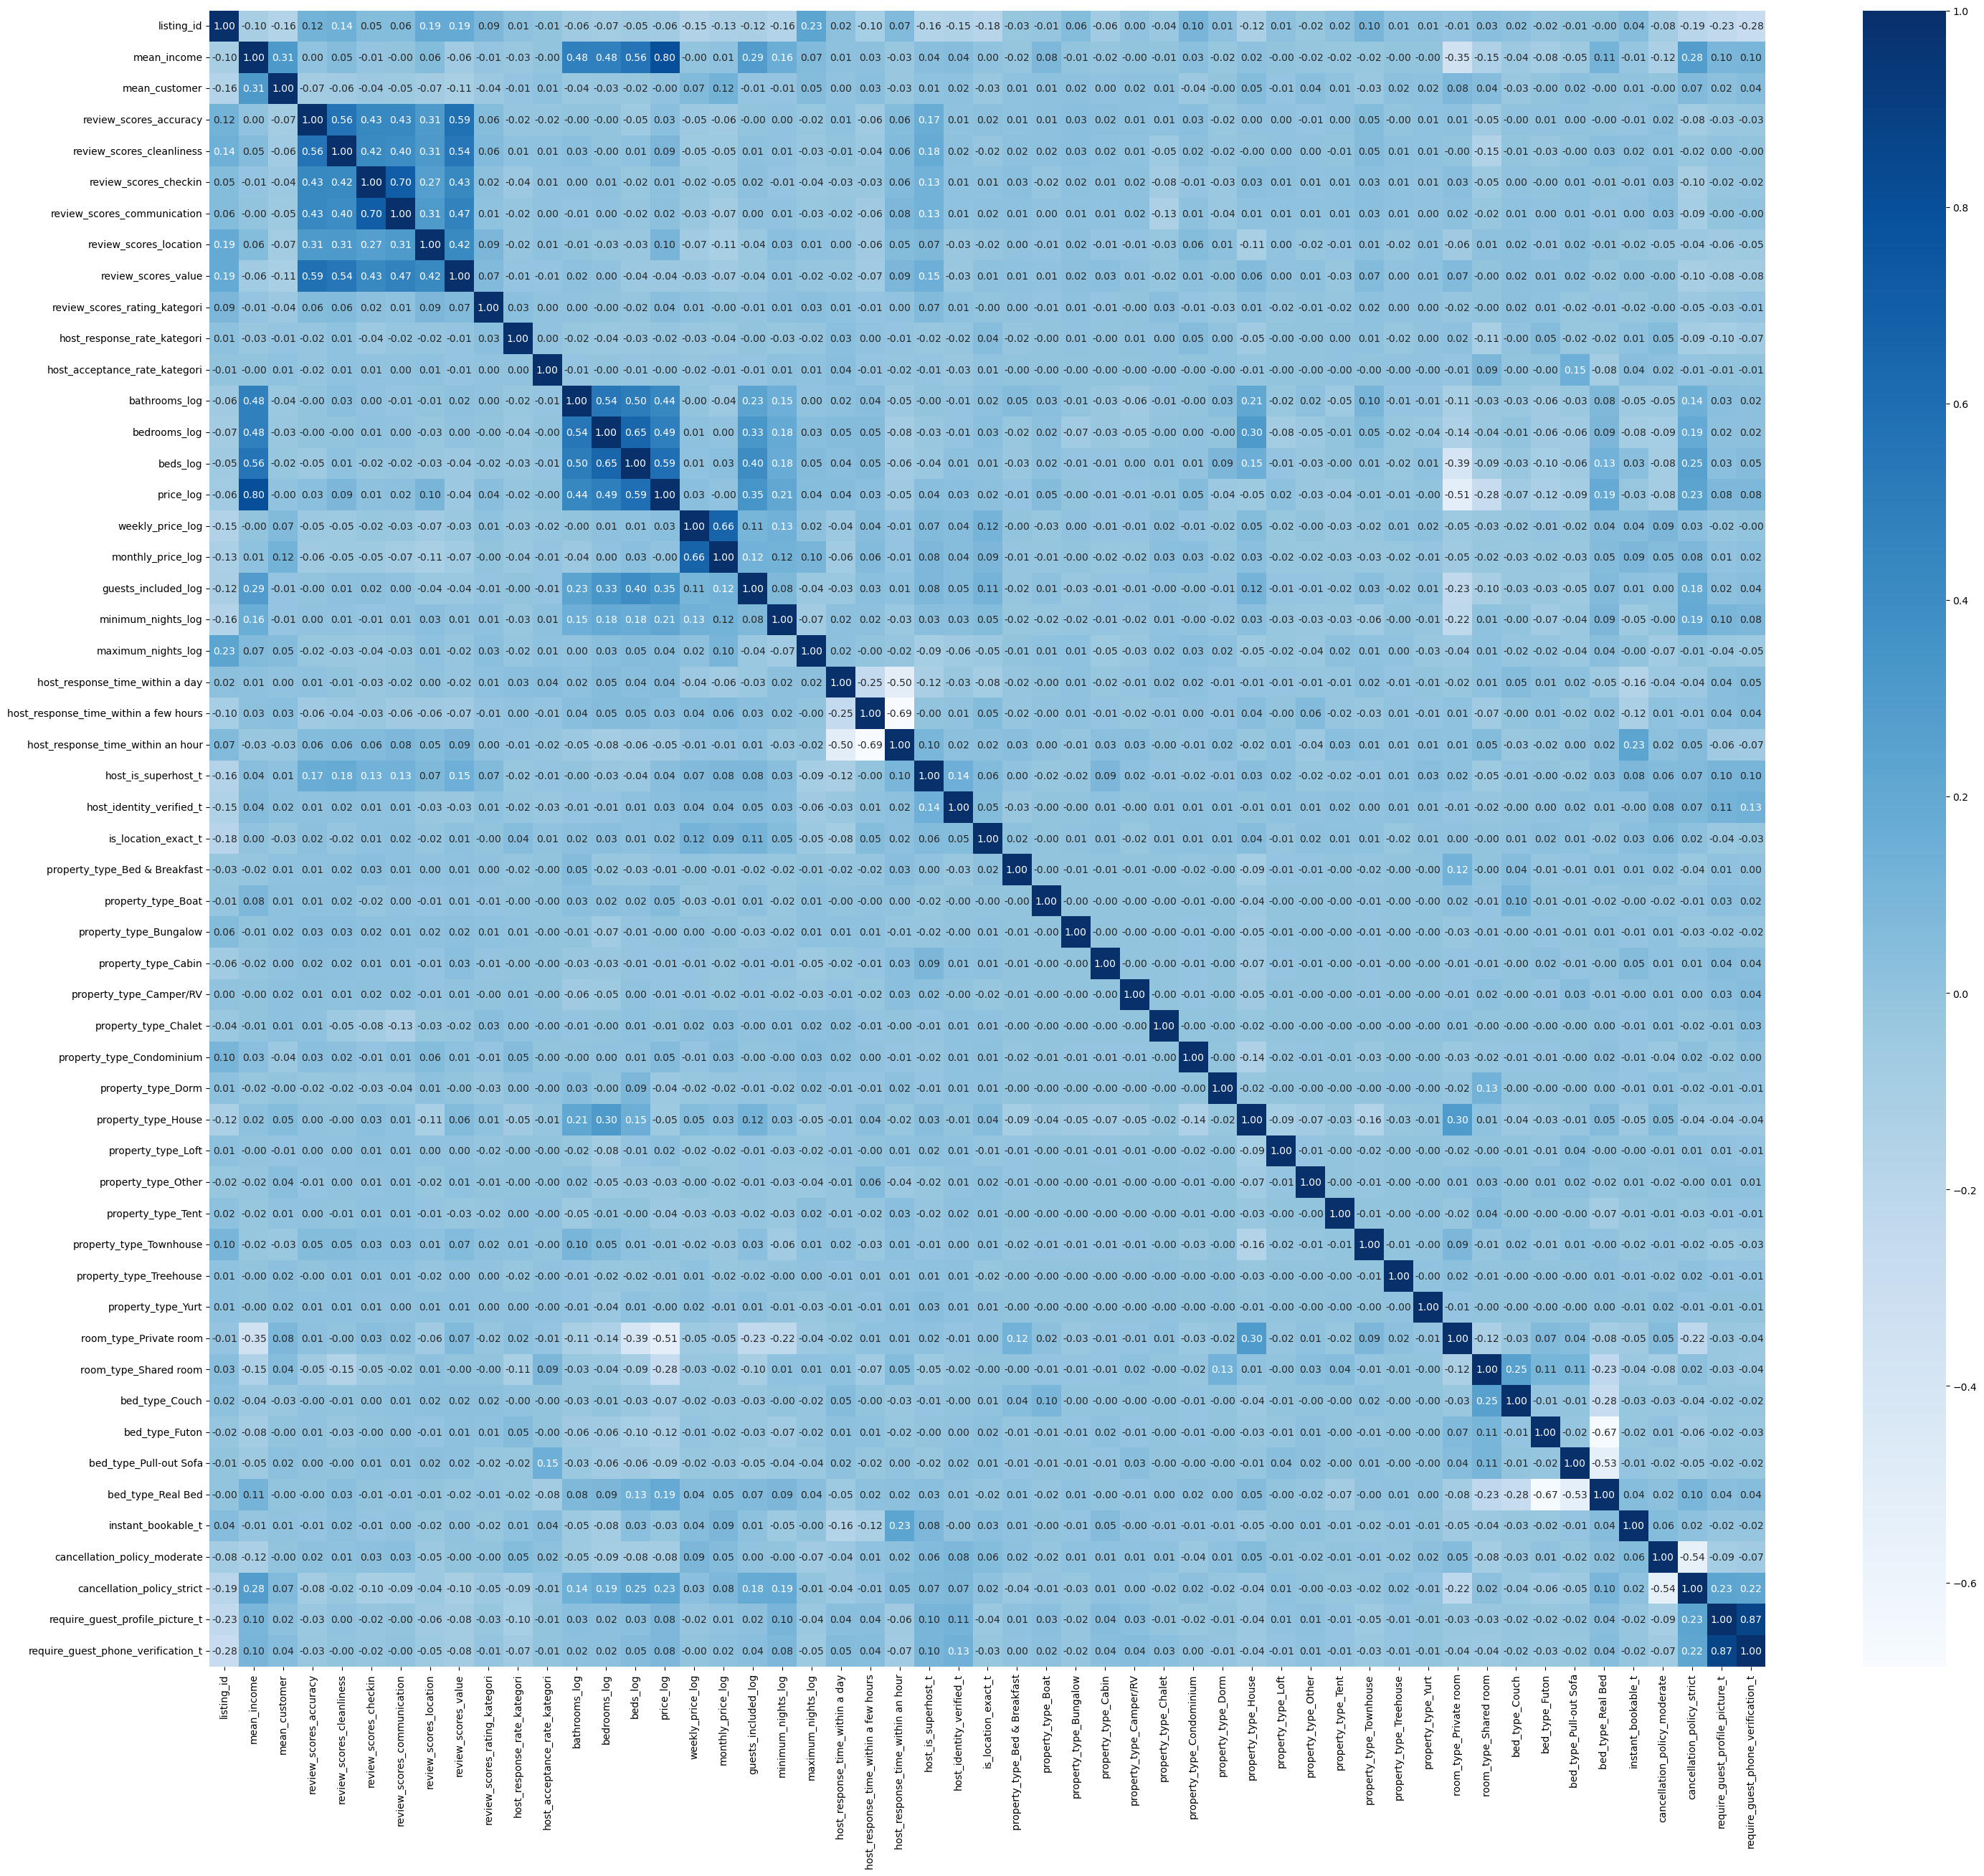

In [244]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [246]:
df2 = df2.drop(columns=['beds_log','review_scores_communication','review_scores_value'])

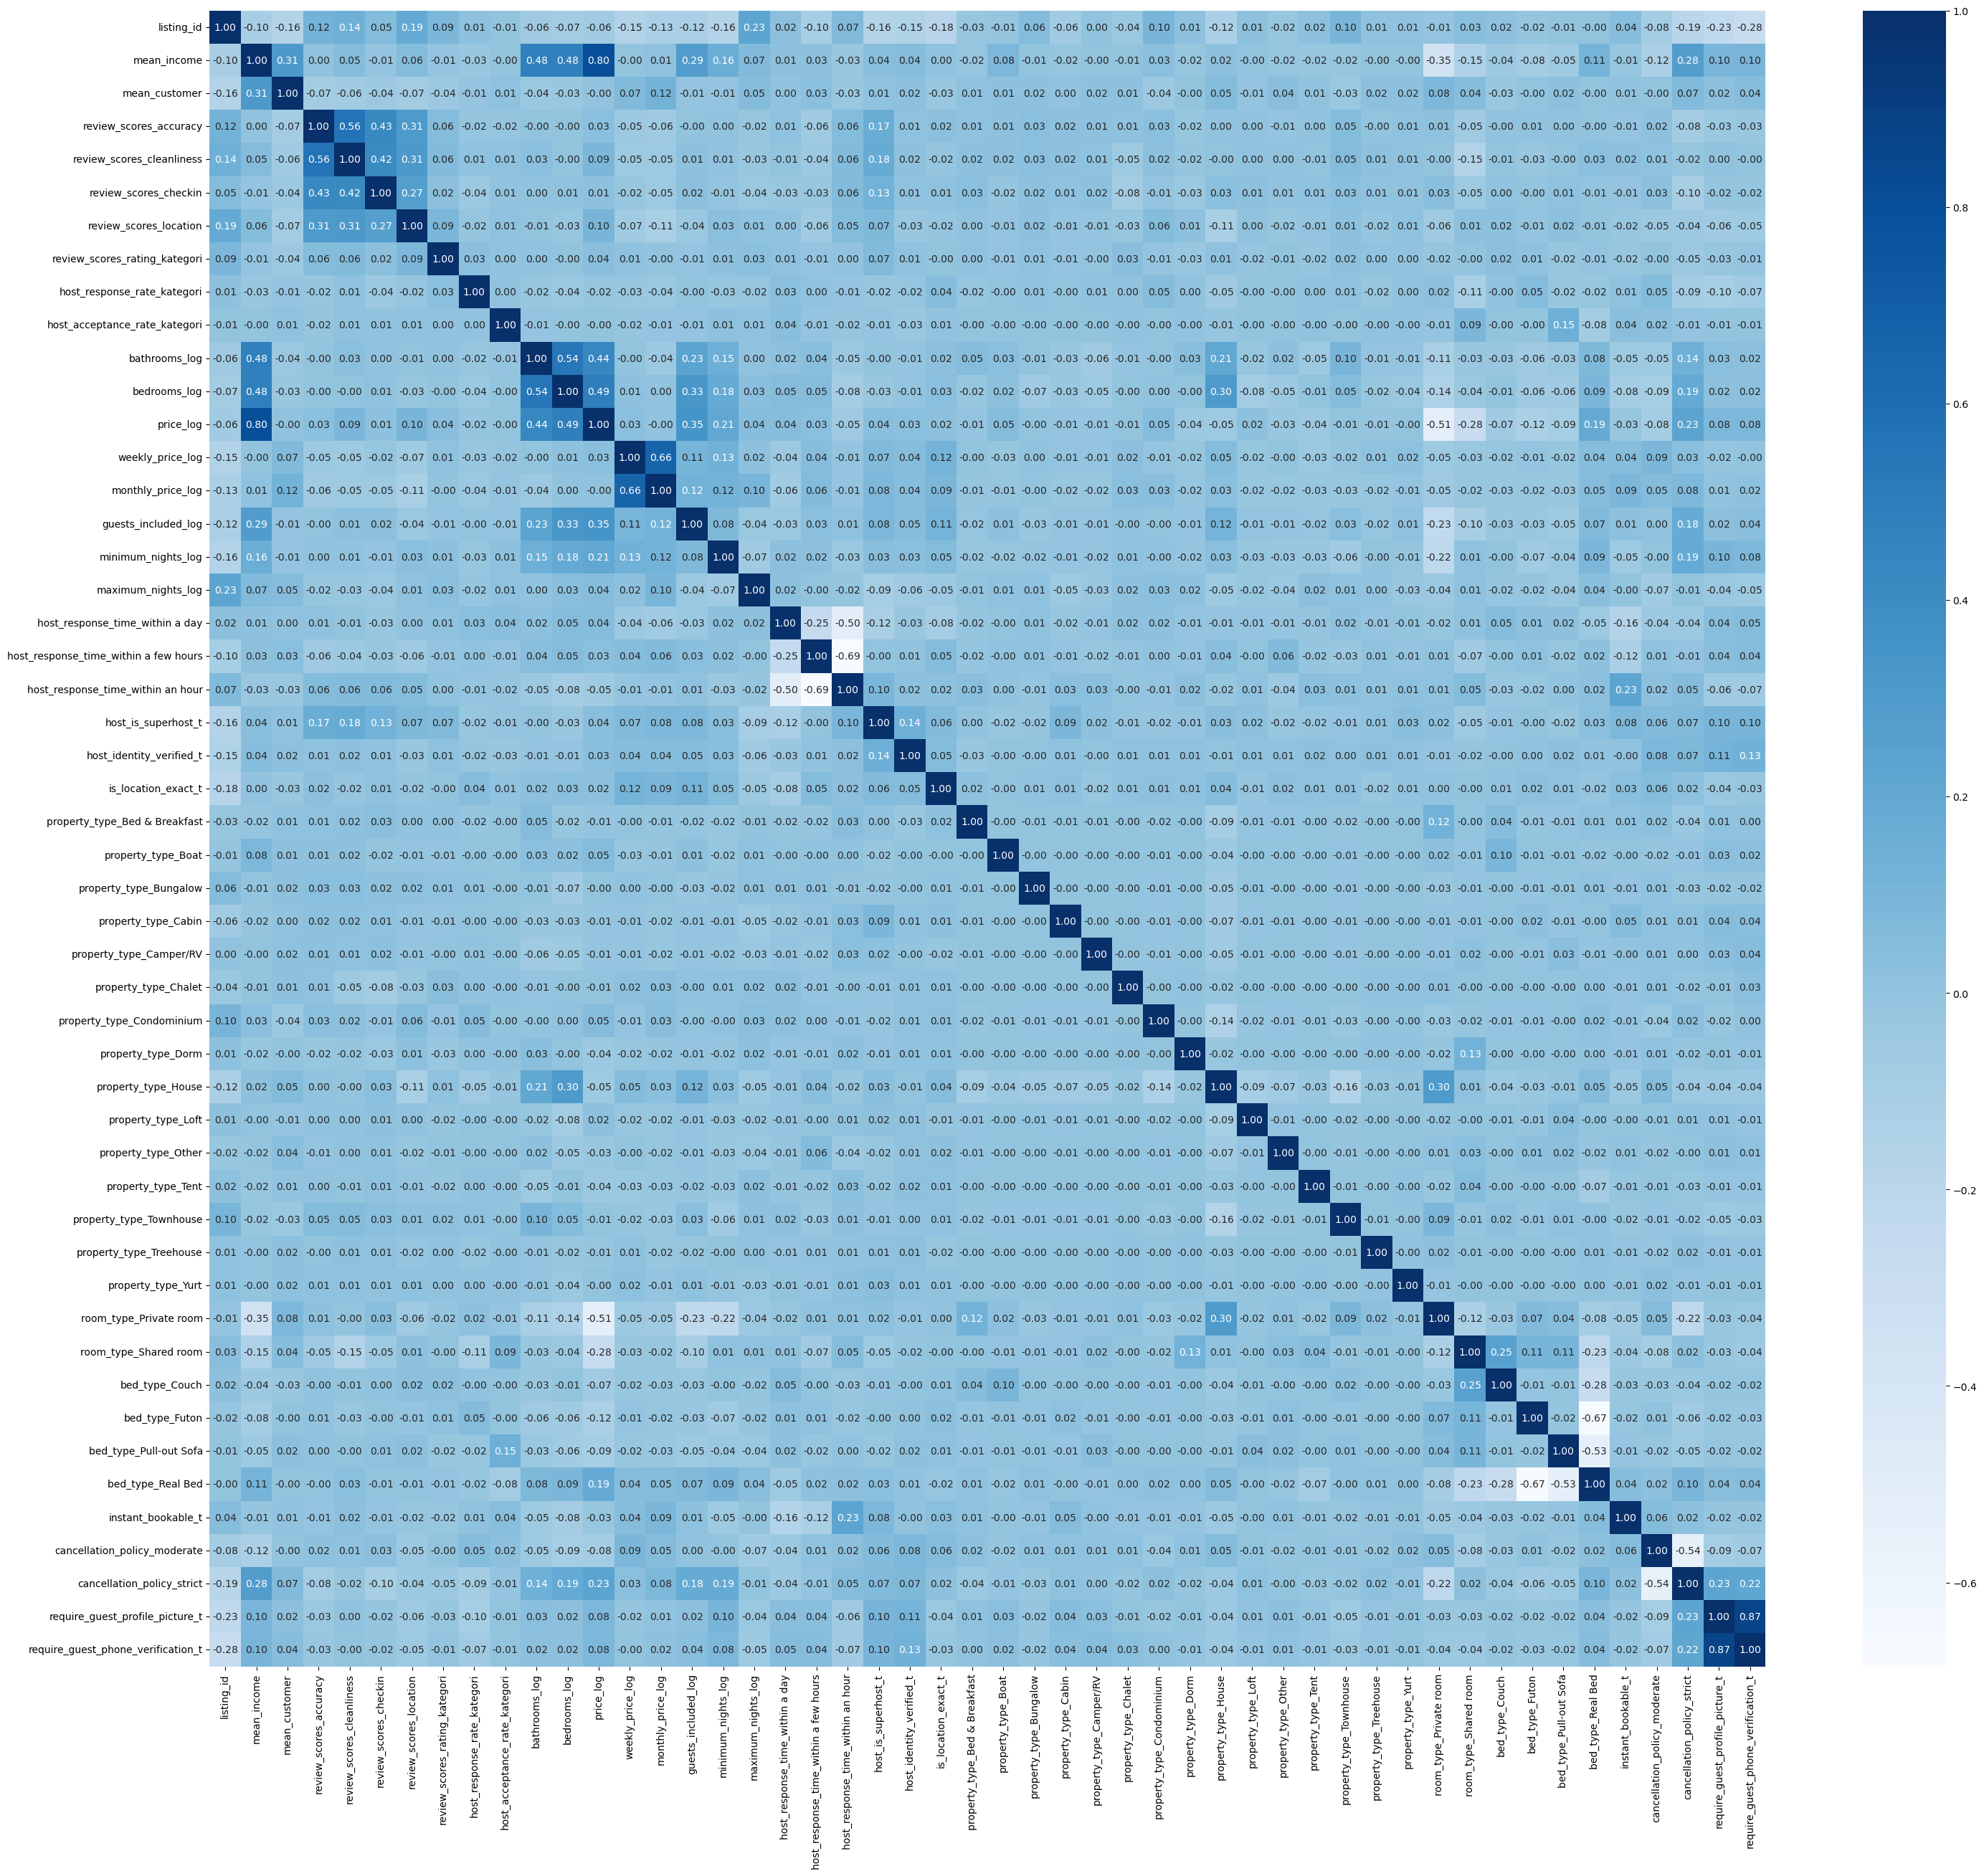

In [248]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [250]:
df2 = df2.drop(columns=['review_scores_cleanliness','bathrooms_log','weekly_price_log','monthly_price_log','require_guest_profile_picture_t'])

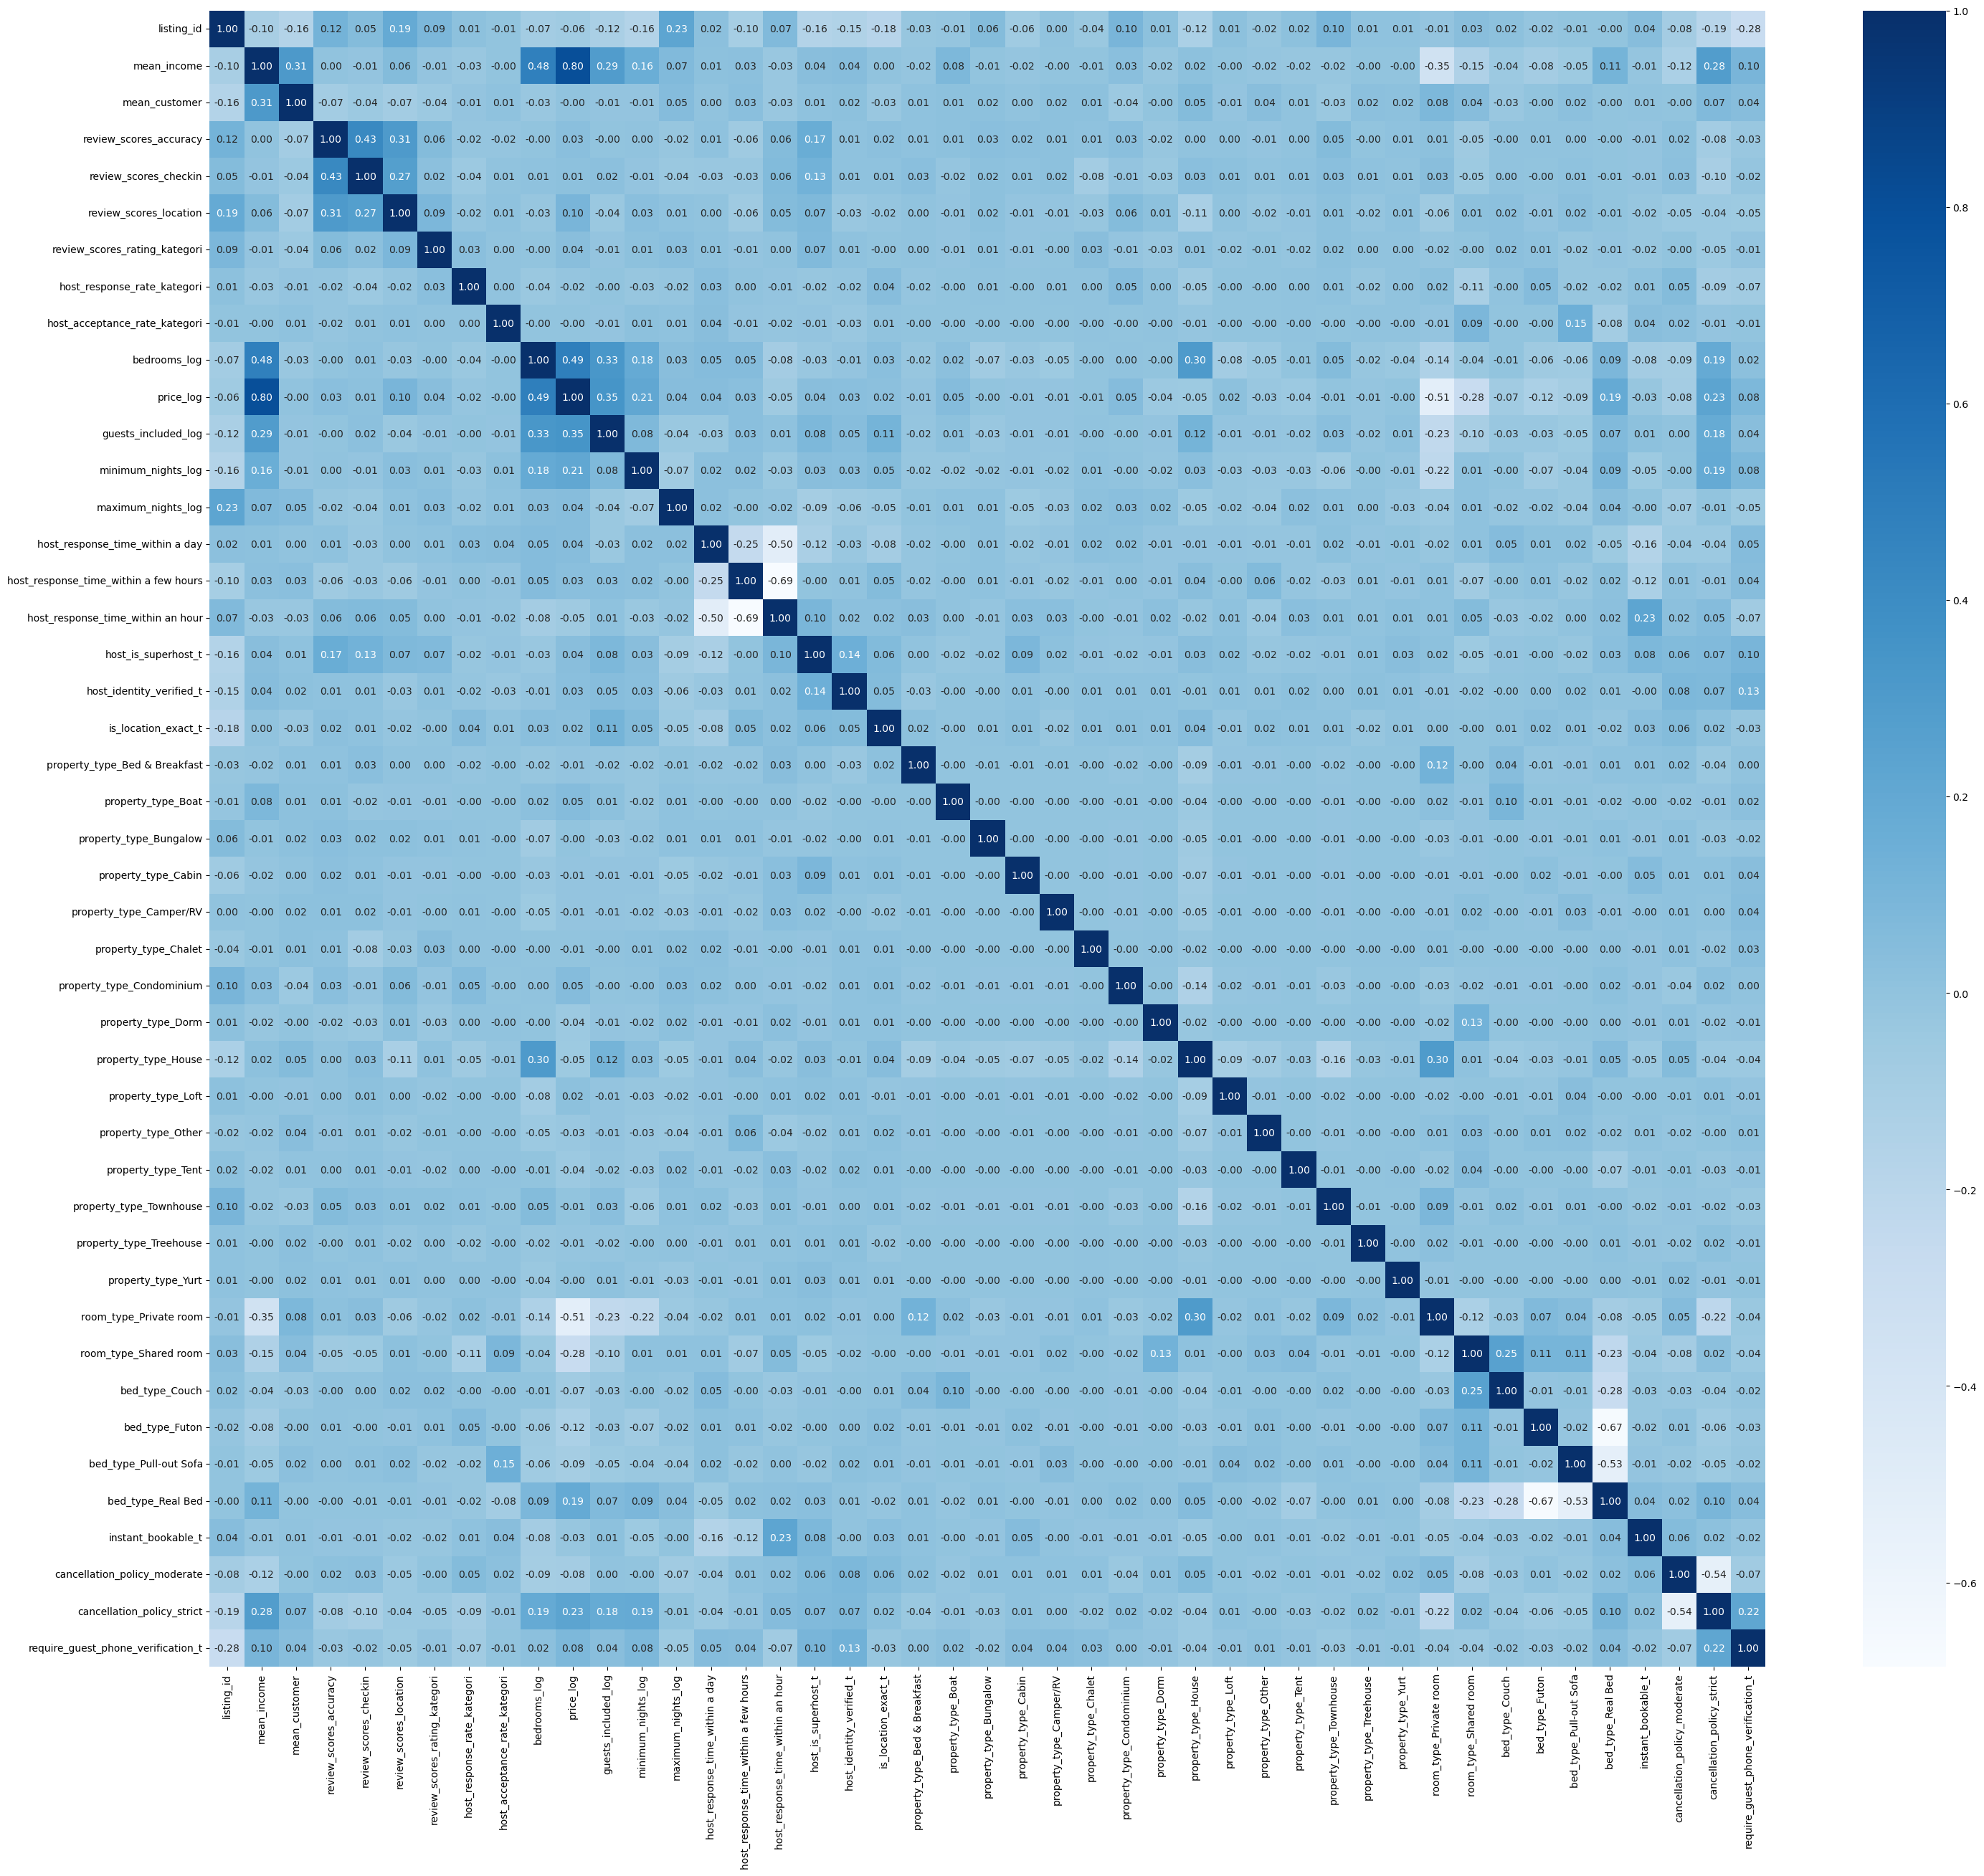

In [252]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [254]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_checkin                    0
review_scores_location                   0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
bedrooms_log                             0
price_log                                0
guests_included_log                      0
minimum_nights_log                       0
maximum_nights_log                       0
host_response_time_within a day          0
host_response_time_within a few hours    0
host_response_time_within an hour        0
host_is_superhost_t                      0
host_identity_verified_t                 0
is_location

In [256]:
df2 = df2.select_dtypes(include=[np.number])

# Check infinity
print("\nInfinity?")
print(np.isinf(numeric_df).any())
# Check NaN
print("NaN in every coloumn:")
print(numeric_df.isna().sum())


Infinity?
listing_id                               False
mean_income                              False
mean_customer                            False
review_scores_accuracy                   False
review_scores_checkin                    False
review_scores_location                   False
review_scores_rating_kategori            False
host_response_rate_kategori              False
host_acceptance_rate_kategori            False
bedrooms_log                             False
price_log                                False
guests_included_log                      False
minimum_nights_log                       False
maximum_nights_log                       False
host_response_time_within a day          False
host_response_time_within a few hours    False
host_response_time_within an hour        False
host_is_superhost_t                      False
host_identity_verified_t                 False
is_location_exact_t                      False
property_type_Bed & Breakfast            False
pr

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

In [260]:
print(vif_data)

                          feature         VIF
0                      listing_id    5.296959
1                     mean_income    8.365809
2                   mean_customer   22.760632
3          review_scores_accuracy  275.152459
4           review_scores_checkin  345.001503
5          review_scores_location  277.327921
6   review_scores_rating_kategori    7.487571
7     host_response_rate_kategori    6.967544
8   host_acceptance_rate_kategori    1.001567
9                    bedrooms_log    8.178228
10                      price_log  196.051958
11            guests_included_log    8.343466
12             minimum_nights_log    8.387976
13             maximum_nights_log   11.535378


In [262]:
df2 = df2.drop(columns=['review_scores_accuracy','review_scores_checkin','review_scores_location','maximum_nights_log'])

In [264]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

                         feature        VIF
0                     listing_id   4.667964
1                    mean_income   4.410475
2                  mean_customer  16.032140
3  review_scores_rating_kategori   7.393432
4    host_response_rate_kategori   6.918940
5  host_acceptance_rate_kategori   1.000760
6                   bedrooms_log   8.123367
7                      price_log  54.911381
8            guests_included_log   8.308873
9             minimum_nights_log   8.309583


# Stage 3

In [267]:
print(df2.columns)

Index(['listing_id', 'mean_income', 'mean_customer',
       'review_scores_rating_kategori', 'host_response_rate_kategori',
       'host_acceptance_rate_kategori', 'bedrooms_log', 'price_log',
       'guests_included_log', 'minimum_nights_log'],
      dtype='object')


In [269]:
# Features
X = df2[['review_scores_rating_kategori', 'host_response_rate_kategori',
       'host_acceptance_rate_kategori', 'bedrooms_log', 'price_log',
       'guests_included_log', 'minimum_nights_log']]

# Target for model 1: mean_income
y_income = df2['mean_income']

# Target for model 2: mean_customer
y_customer = df2['mean_customer']

In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Liniear Regression

In [274]:
from sklearn.linear_model import LinearRegression

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_income, y_test_income, y_train_customer, y_test_customer = train_test_split(
    X, y_income, y_customer, test_size=0.2, random_state=42)

In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [280]:
# Model Linear Regression for mean_income
model_income = LinearRegression()
model_income.fit(X_train_scaled, y_train_income)

# Model Linear Regression for mean_customer
model_customer = LinearRegression()
model_customer.fit(X_train_scaled, y_train_customer)

LinearRegression()

In [282]:
# Prediction for mean_income
y_pred_income = model_income.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Mean Income - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

# Prediction for mean_customer
y_pred_customer = model_customer.predict(X_test_scaled)
mse_customer = mean_squared_error(y_test_customer, y_pred_customer)
r2_customer = r2_score(y_test_customer, y_pred_customer)

print(f"Mean Customer - MSE: {mse_customer:.2f}, R²: {r2_customer:.2f}")

Mean Income - MSE: 2532046.37, R²: 0.64
Mean Customer - MSE: 34.39, R²: 0.00


In [284]:
# Prediction for mean_income on training data
y_train_pred_income = model_income.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Mean Income (Train) - MSE: {mse_train_income:.2f}, R²: {r2_train_income:.2f}")

# Prediction for mean_customer on training data
y_train_pred_customer = model_customer.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)

print(f"Mean Customer (Train) - MSE: {mse_train_customer:.2f}, R²: {r2_train_customer:.2f}")

Mean Income (Train) - MSE: 2197708.58, R²: 0.66
Mean Customer (Train) - MSE: 31.42, R²: 0.00


In [286]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Model Linear Regression
linear_model = LinearRegression()

# Scorer for RMSE (Root Mean Squared Error)
mse_scorer = make_scorer(mean_squared_error)

# Cross-validation in data training
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train_income, 
                             cv=5, scoring=mse_scorer)

# Result CV
print(f"CV Linear Regression - MSE: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV Linear Regression - MSE: 2253680.7432 ± 114108.9034


In [288]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge Regression model (L2 regularization)
ridge = Ridge()

# Define the parameter grid for tuning
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Alpha value for L2 regularization
}

# Use GridSearchCV for best parameter search
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train_scaled, y_train_income)  # Gunakan X_train_scaled dan target yang sesuai

# Check best parameter
print("Best Parameters (Ridge Regression):", grid_search_ridge.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Ridge Regression): {'alpha': 10}


In [290]:
# Ridge model with the best parameters
best_ridge = grid_search_ridge.best_estimator_

# Retrain the model with the best parameters
best_ridge.fit(X_train_scaled, y_train_income)

# Prediction and evaluation
y_pred_income = best_ridge.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Best Ridge - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Ridge - MSE: 2533811.61, R²: 0.64


In [292]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge Regression model (L2 regularization)
ridge = Ridge()

# Define the parameter grid for tuning
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Alpha value for L2 regularization
}

# Use GridSearchCV for best parameter search
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train_scaled, y_train_customer)  # Gunakan X_train_scaled dan target yang sesuai

# Check best parameter
print("Best Parameters (Ridge Regression):", grid_search_ridge.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Ridge Regression): {'alpha': 100}


In [294]:
# Ridge model with the best parameters
best_ridge = grid_search_ridge.best_estimator_

# Retrain the model with the best parameters
best_ridge.fit(X_train_scaled, y_train_customer)

# Prediction and evaluation
y_pred_income = best_ridge.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_customer, y_pred_customer)
r2_income = r2_score(y_test_customer, y_pred_customer)

print(f"Best Ridge - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Ridge - MSE: 34.39, R²: 0.00


In [296]:
import pandas as pd
import numpy as np

# Retrain Ridge Regression with the best parameters
best_ridge = grid_search_ridge.best_estimator_
best_ridge.fit(X_train_scaled, y_train_income)

# Getting coefficients
coefficients = best_ridge.coef_

# Converts X_train_scaled to DataFrame
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Arrange the results into a DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Coefficient': coefficients
})

# Sort by greatest influence
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                         Feature  Coefficient
4                      price_log  1803.260560
3                   bedrooms_log   353.959436
2  host_acceptance_rate_kategori    -2.761626
5            guests_included_log   -15.235910
6             minimum_nights_log   -24.395773
1    host_response_rate_kategori   -28.909025
0  review_scores_rating_kategori   -67.150744


## Random Forest

In [299]:
from sklearn.ensemble import RandomForestRegressor

# Model for mean_income
model_income = RandomForestRegressor(random_state=42)
model_income.fit(X_train_scaled, y_train_income)

# Model for mean_customer
model_customer = RandomForestRegressor(random_state=42)
model_customer.fit(X_train_scaled, y_train_customer)

RandomForestRegressor(random_state=42)

In [301]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediction mean_income
y_pred_income = model_income.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Mean Income - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

# Prediction mean_customer
y_pred_customer = model_customer.predict(X_test_scaled)
mse_customer = mean_squared_error(y_test_customer, y_pred_customer)
r2_customer = r2_score(y_test_customer, y_pred_customer)

print(f"Mean Customer - MSE: {mse_customer:.2f}, R²: {r2_customer:.2f}")

Mean Income - MSE: 1635831.47, R²: 0.77
Mean Customer - MSE: 38.58, R²: -0.12


In [303]:
# Evaluation on training data
# Mean Income
y_train_pred_income = model_income.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Train Mean Income - MSE: {mse_train_income:.2f}, R²: {r2_train_income:.2f}")

# Mean Customer
y_train_pred_customer = model_customer.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)

print(f"Train Mean Customer - MSE: {mse_train_customer:.2f}, R²: {r2_train_customer:.2f}")

Train Mean Income - MSE: 439436.22, R²: 0.93
Train Mean Customer - MSE: 14.62, R²: 0.54


In [305]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Default Random Forest model
rf_default = RandomForestRegressor(random_state=42)

# Cross-validation
cv_scores_default = cross_val_score(rf_default, X_train_scaled, y_train_income, 
                                    cv=5, scoring='neg_mean_squared_error')

# Mean and standard deviation of MSE
mse_default = (-cv_scores_default) ** 0.5  # Negatif diubah ke positif
print(f"CV MSE (Default): {mse_default.mean():.4f} ± {mse_default.std():.4f}")

CV MSE (Default): 1292.8214 ± 58.1974


In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV for best parameter search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train_income)  # Gunakan X_train_scaled dan target yang sesuai

# Check the best parameters
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [309]:
# RandomForest model with the best parameters
best_rf = grid_search_rf.best_estimator_

# Retrain the model with the best parameters
best_rf.fit(X_train_scaled, y_train_income)

# Prediction and evaluation
y_pred_income = best_rf.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Best Random Forest - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Random Forest - MSE: 1762732.56, R²: 0.75


In [311]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediction on training data
y_train_pred_income = best_rf.predict(X_train_scaled)

# Evaluation on training data
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Best Random Forest - Train MSE: {mse_train_income:.2f}, Train R²: {r2_train_income:.2f}")

# Evaluation on test data
y_test_pred_income = best_rf.predict(X_test_scaled)
mse_test_income = mean_squared_error(y_test_income, y_test_pred_income)
r2_test_income = r2_score(y_test_income, y_test_pred_income)

print(f"Best Random Forest - Test MSE: {mse_test_income:.2f}, Test R²: {r2_test_income:.2f}")

Best Random Forest - Train MSE: 871470.64, Train R²: 0.86
Best Random Forest - Test MSE: 1762732.56, Test R²: 0.75


In [313]:
# Random Forest model with the best hyperparameters
rf_tuned = RandomForestRegressor(random_state=42, **grid_search_rf.best_params_)

# Cross-validation
cv_scores_tuned = cross_val_score(rf_tuned, X_train_scaled, y_train_income, 
                                  cv=5, scoring='neg_mean_squared_error')

# Mean and standard deviation of RMSE
mse_tuned = (-cv_scores_tuned) ** 0.5
print(f"CV MSE (Tuned): {mse_tuned.mean():.4f} ± {mse_tuned.std():.4f}")

CV MSE (Tuned): 1256.5358 ± 23.2437


In [315]:
# Evaluation of test data already exists
y_pred_test = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test_income, y_pred_test)
r2_test = r2_score(y_test_income, y_pred_test)

# Evaluation on training data
y_pred_train = best_rf.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_income, y_pred_train)
r2_train = r2_score(y_train_income, y_pred_train)

print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test:.4f}")

Train MSE: 871470.6436, Train R²: 0.8636
Test MSE: 1762732.5607, Test R²: 0.7515


In [317]:
# Evaluation of test data already exists
y_pred_test = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test_customer, y_pred_test)
r2_test = r2_score(y_test_customer, y_pred_test)

# Evaluation on training data
y_pred_train = best_rf.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_customer, y_pred_train)
r2_train = r2_score(y_train_customer, y_pred_train)

print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test:.4f}")

Train MSE: 15275160.2987, Train R²: -484815.3162
Test MSE: 15648592.1726, Test R²: -453333.7527


In [319]:
# Get feature importance
feature_importance = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                         Feature  Importance
4                      price_log    0.655038
3                   bedrooms_log    0.194106
5            guests_included_log    0.082574
6             minimum_nights_log    0.043258
1    host_response_rate_kategori    0.013520
0  review_scores_rating_kategori    0.011492
2  host_acceptance_rate_kategori    0.000012


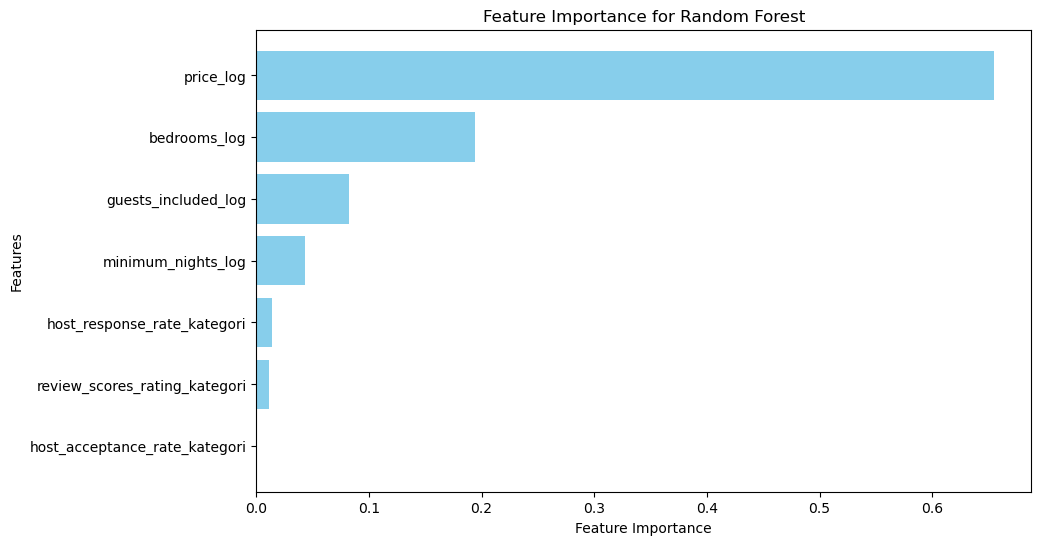

In [321]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Urutkan dari atas ke bawah
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.show()

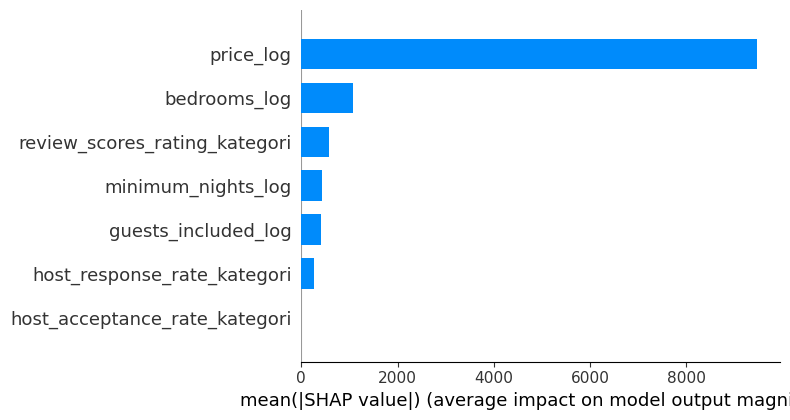

In [323]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Visualization
shap.summary_plot(shap_values, X_test, plot_type="bar")

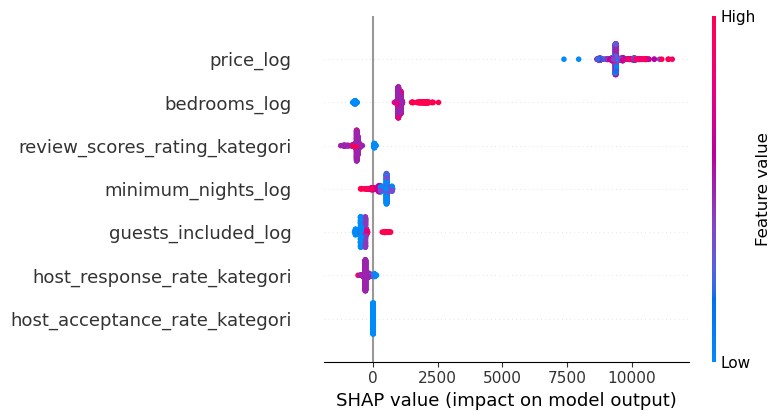

In [325]:
shap.summary_plot(shap_values, X_test)

## SVR (Super Vector Regression)

### SVR without PCA 

In [329]:
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train the model using SVR with PCA reduced data
svr = SVR()
svr.fit(X_train_scaled, y_train_customer)
svr.fit(X_train_scaled, y_train_income)

# Prediction and evaluation on Mean_Income training data
y_train_income_pred = svr.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_income_pred)
r2_train_income = r2_score(y_train_income, y_train_income_pred)

# Prediction and evaluation on Mean_Income testing data
y_test_income_pred = svr.predict(X_test_scaled) 
mse_test_income = mean_squared_error(y_test_income, y_test_income_pred)
r2_test_income = r2_score(y_test_income, y_test_income_pred)

# Prediction and evaluation on Mean_customer training data
y_train_customer_pred = svr.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_customer_pred)
r2_train_customer = r2_score(y_train_customer, y_train_customer_pred)

# Prediction and evaluation on Mean_customer testing data
y_test_customer_pred = svr.predict(X_test_scaled) 
mse_test_customer = mean_squared_error(y_test_customer, y_test_customer_pred)
r2_test_customer = r2_score(y_test_customer, y_test_customer_pred)

# Show evaluation results
print("Evaluasi Model SVR (Training Data mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")

print("\nEvaluasi Model SVR (Testing Data mean_income):")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR (Training Data mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")

print("\nEvaluasi Model SVR (Testing Data mean_custmer):")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")


Evaluasi Model SVR (Training Data mean_income):
MSE (Training): 6346883.6157
R² (Training): 0.0067

Evaluasi Model SVR (Testing Data mean_income):
MSE (Testing): 7122199.4882
R² (Testing): -0.0040

Evaluasi Model SVR (Training Data mean_customer):
MSE (Training): 6717812.5126
R² (Training): -213214.7733

Evaluasi Model SVR (Testing Data mean_custmer):
MSE (Testing): 6734840.5187
R² (Testing): -195105.1940


### Hyperparameter Tuning without PCA

In [332]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform

# Smaller grid parameters
param_distributions = {
    'kernel': ['linear'],
    'C': uniform(1, 11),  # The C value is between 1 and 11
    'epsilon': uniform(0.1, 1),  # The epsilon value is between 0.1 and 1
    'gamma': ['scale', 'auto']
}

# RandomizedSearch for mean_income
svr_income = SVR()
random_search_income = RandomizedSearchCV(
    svr_income, 
    param_distributions, 
    n_iter=20,  # Maximum 20 combinations
    scoring='r2', 
    cv=3,  # Using 3 fold cross-validation
    n_jobs=-1,  # Parallel to speed things up
    random_state=42
)
random_search_income.fit(X_train_scaled, y_train_income)

# Best model for mean_income
best_svr_income = random_search_income.best_estimator_
print("Best Parameters for mean_income:", random_search_income.best_params_)

# Evaluation for mean_income
y_train_pred_income = best_svr_income.predict(X_train_scaled)
y_test_pred_income = best_svr_income.predict(X_test_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)
mse_test_income = mean_squared_error(y_test_income, y_test_pred_income)
r2_test_income = r2_score(y_test_income, y_test_pred_income)

# RandomizedSearch for mean_customer
svr_customer = SVR()
random_search_customer = RandomizedSearchCV(
    svr_customer, 
    param_distributions, 
    n_iter=20, 
    scoring='r2', 
    cv=3, 
    n_jobs=-1, 
    random_state=42
)
random_search_customer.fit(X_train_scaled, y_train_customer)

# Best model for mean_customer
best_svr_customer = random_search_customer.best_estimator_
print("Best Parameters for mean_customer:", random_search_customer.best_params_)

# Evaluation for mean_customer
y_train_pred_customer = best_svr_customer.predict(X_train_scaled)
y_test_pred_customer = best_svr_customer.predict(X_test_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)
mse_test_customer = mean_squared_error(y_test_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_customer, y_test_pred_customer)

# Evaluation results
print("\nEvaluasi Model SVR tanpa PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR tanpa PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")

Best Parameters for mean_income: {'C': 11.81553974387467, 'epsilon': 0.5667628932479799, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for mean_customer: {'C': 1.226429437253827, 'epsilon': 1.0699098521619943, 'gamma': 'auto', 'kernel': 'linear'}

Evaluasi Model SVR tanpa PCA (mean_income):
MSE (Training): 0.0000
R² (Training): 0.6174
MSE (Testing): 2857128.2604
R² (Testing): 0.5972

Evaluasi Model SVR tanpa PCA (mean_customer):
MSE (Training): 35.8191
R² (Training): -0.1369
MSE (Testing): 39.2146
R² (Testing): -0.1360


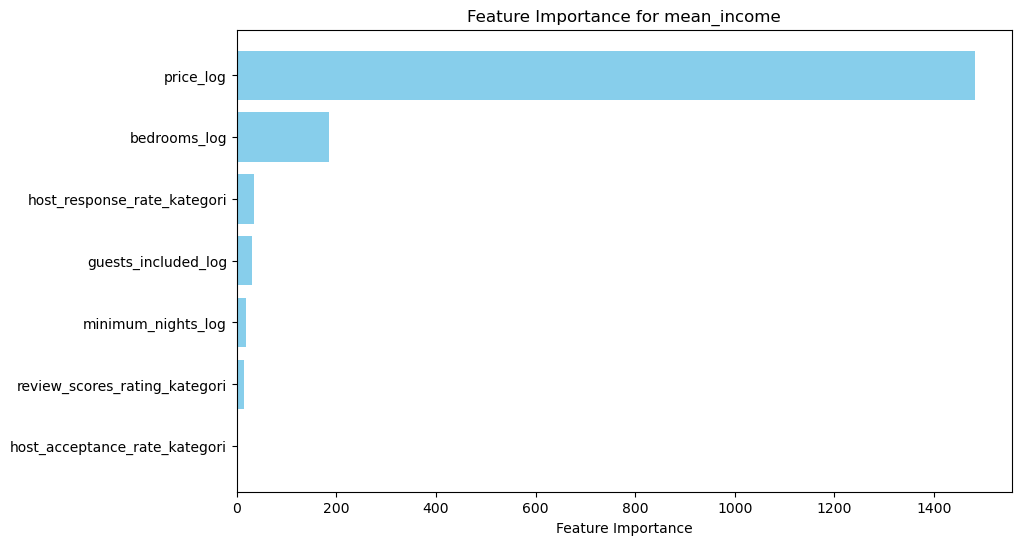

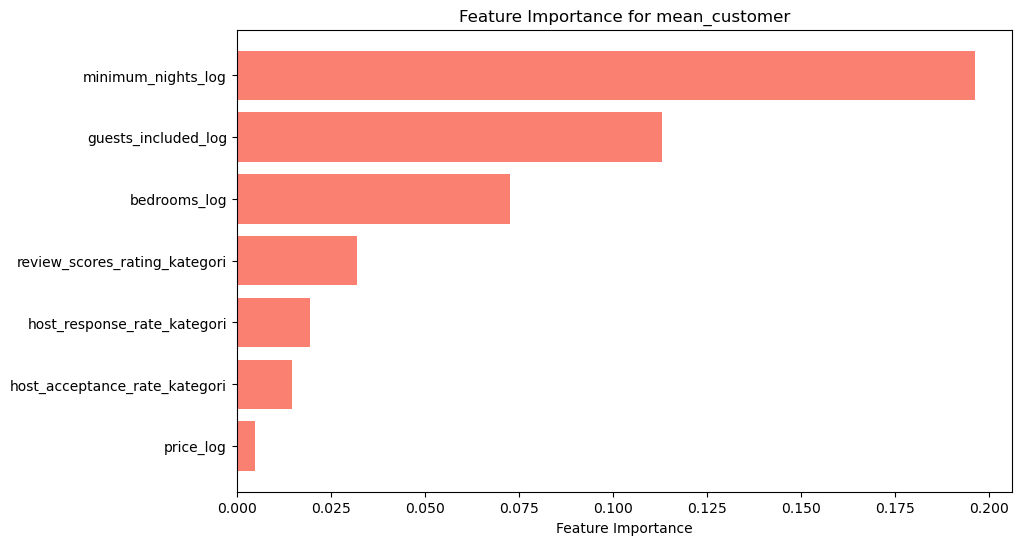

In [334]:
# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


# Make sure the kernel is linear
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    feature_importance_income = pd.DataFrame({
        'Feature': X_train_scaled_df.columns,
        'Importance': np.abs(coef_income)
    }).sort_values(by='Importance', ascending=True)

    # Visualize with horizontal bars
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_income['Feature'], feature_importance_income['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for mean_income')
    plt.show()

# Customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    feature_importance_customer = pd.DataFrame({
        'Feature': X_train_scaled_df.columns,
        'Importance': np.abs(coef_customer)
    }).sort_values(by='Importance', ascending=True)

    # Visualize with horizontal bars
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_customer['Feature'], feature_importance_customer['Importance'], color='salmon')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for mean_customer')
    plt.show()

### Using PCA

In [336]:
df2pca = df2.drop(columns=['listing_id'])

Explained Variance by Components: [0.27833968 0.12555219 0.11359827 0.11185439 0.10827784]


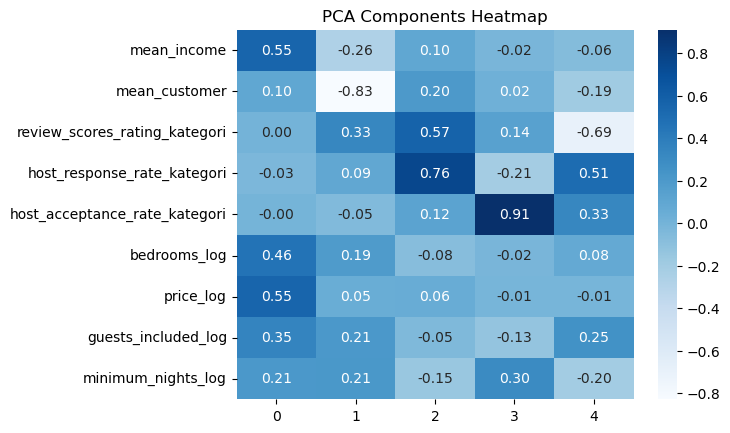

In [338]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardization of numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2pca)

# Perform PCA
pca = PCA(n_components=5)  # Choose 5 main components
pca_data = pca.fit_transform(scaled_data)

# Show the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Components: {explained_variance}")

# Correlation of principal components
pca_corr_matrix = pd.DataFrame(pca.components_, columns=df2pca.columns).T
sns.heatmap(pca_corr_matrix, cmap="Blues", annot=True, fmt='.2f')
plt.title("PCA Components Heatmap")
plt.show()

In [340]:
print(pca.components_.shape)

(5, 9)


In [344]:
print(X_train.shape)

(2978, 7)


In [346]:
from sklearn.model_selection import train_test_split
X_pca = pca_data  # Data that has been reduced by PCA
y_pca_income = df2pca['mean_income']  # The target column you want to predict
y_pca_customer =  df2pca['mean_customer'] 

# Split data for y_pca_income
X_train_pca, X_test_pca, y_train_pca_income, y_test_pca_income = train_test_split(
    X_pca, y_pca_income, test_size=0.2, random_state=42
)

# Split data for y_pca_customer
_, _, y_train_pca_customer, y_test_pca_customer = train_test_split(
    X_pca, y_pca_customer, test_size=0.2, random_state=42
)

In [348]:
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Model for mean_income
svr_income = SVR()
svr_income.fit(X_train_pca, y_train_pca_income)

# Prediction and evaluation on training data for mean_income
y_train_pred_income = svr_income.predict(X_train_pca)
mse_train_income = mean_squared_error(y_train_pca_income, y_train_pred_income)
r2_train_income = r2_score(y_train_pca_income, y_train_pred_income)

# Prediction and evaluation on test data for mean_income
y_test_pred_income = svr_income.predict(X_test_pca)
mse_test_income = mean_squared_error(y_test_pca_income, y_test_pred_income)
r2_test_income = r2_score(y_test_pca_income, y_test_pred_income)

# Model for mean_customer
svr_customer = SVR()
svr_customer.fit(X_train_pca, y_train_pca_customer)

# Prediction and evaluation on training data for mean_customer
y_train_pred_customer = svr_customer.predict(X_train_pca)
mse_train_customer = mean_squared_error(y_train_pca_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_pca_customer, y_train_pred_customer)

# Prediction and evaluation on test data for mean_customer
y_test_pred_customer = svr_customer.predict(X_test_pca)
mse_test_customer = mean_squared_error(y_test_pca_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_pca_customer, y_test_pred_customer)

# Show evaluation results
print("\nEvaluation of SVR Model with PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluation of SVR Model with PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")


Evaluation of SVR Model with PCA (mean_income):
MSE (Training): 6063039.3128
R² (Training): 0.0511
MSE (Testing): 6874294.6818
R² (Testing): 0.0310

Evaluation of SVR Model with PCA (mean_customer):
MSE (Training): 1.7923
R² (Training): 0.9431
MSE (Testing): 2.1206
R² (Testing): 0.9386


### Hyperparameter tuning SVR with PCA

In [351]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform

# Smaller grid parameters
param_distributions = {
    'kernel': ['linear'],
    'C': uniform(1, 11),  # The C value is between 1 and 11
    'epsilon': uniform(0.1, 1),  # The epsilon value is between 0.1 and 1
    'gamma': ['scale', 'auto']
}

# RandomizedSearch for mean_income
svr_income = SVR()
random_search_income = RandomizedSearchCV(
    svr_income, 
    param_distributions, 
    n_iter=20,  # Maximum 20 combinations
    scoring='r2', 
    cv=3,  # Using 3 fold cross-validation
    n_jobs=-1,  # Parallel to speed things up
    random_state=42
)
random_search_income.fit(X_train_pca, y_train_pca_income)

# Best model for mean_income
best_svr_income = random_search_income.best_estimator_
print("Best Parameters for mean_income:", random_search_income.best_params_)

# Evaluation for mean_income
y_train_pred_income = best_svr_income.predict(X_train_pca)
y_test_pred_income = best_svr_income.predict(X_test_pca)
mse_train_income = mean_squared_error(y_train_pca_income, y_train_pred_income)
r2_train_income = r2_score(y_train_pca_income, y_train_pred_income)
mse_test_income = mean_squared_error(y_test_pca_income, y_test_pred_income)
r2_test_income = r2_score(y_test_pca_income, y_test_pred_income)

# RandomizedSearch for mean_customer
svr_customer = SVR()
random_search_customer = RandomizedSearchCV(
    svr_customer, 
    param_distributions, 
    n_iter=20, 
    scoring='r2', 
    cv=3, 
    n_jobs=-1, 
    random_state=42
)
random_search_customer.fit(X_train_pca, y_train_pca_customer)

# Best model for mean_customer
best_svr_customer = random_search_customer.best_estimator_
print("Best Parameters for mean_customer:", random_search_customer.best_params_)

# Evaluation for mean_customer
y_train_pred_customer = best_svr_customer.predict(X_train_pca)
y_test_pred_customer = best_svr_customer.predict(X_test_pca)
mse_train_customer = mean_squared_error(y_train_pca_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_pca_customer, y_train_pred_customer)
mse_test_customer = mean_squared_error(y_test_pca_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_pca_customer, y_test_pred_customer)

# Evaluation results
print("\nEvaluation of SVR Model with PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluation of SVR Model with PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")

Best Parameters for mean_income: {'C': 9.892370829281072, 'epsilon': 0.40461376917337066, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for mean_customer: {'C': 1.1459145727585318, 'epsilon': 1.0422017556848528, 'gamma': 'auto', 'kernel': 'linear'}

Evaluation of SVR Model with PCA (mean_income):
MSE (Training): 1043993.8702
R² (Training): 0.8366
MSE (Testing): 1182593.0810
R² (Testing): 0.8333

Evaluation of SVR Model with PCA (mean_customer):
MSE (Training): 5.5242
R² (Training): 0.8247
MSE (Testing): 3.7886
R² (Testing): 0.8902


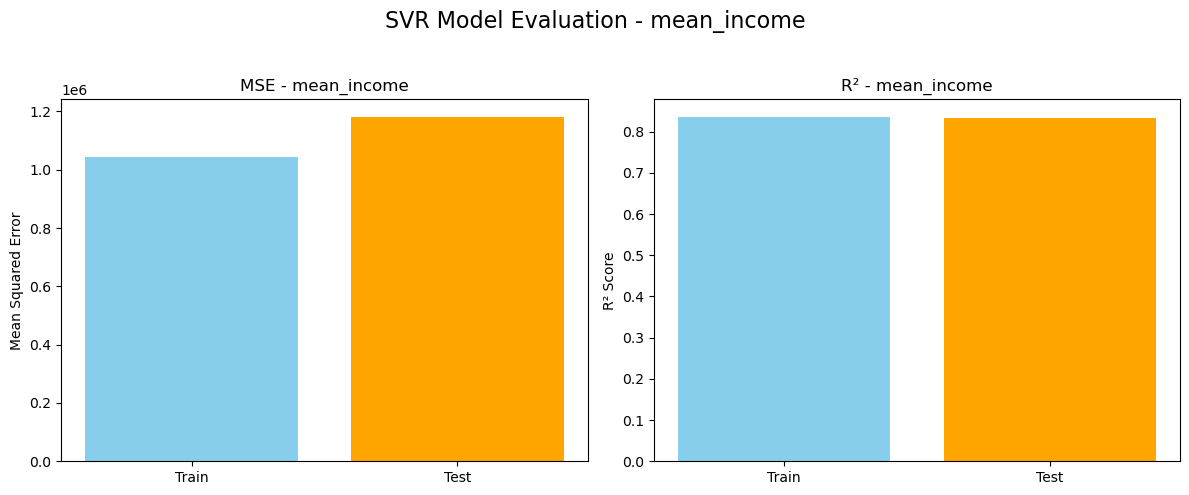

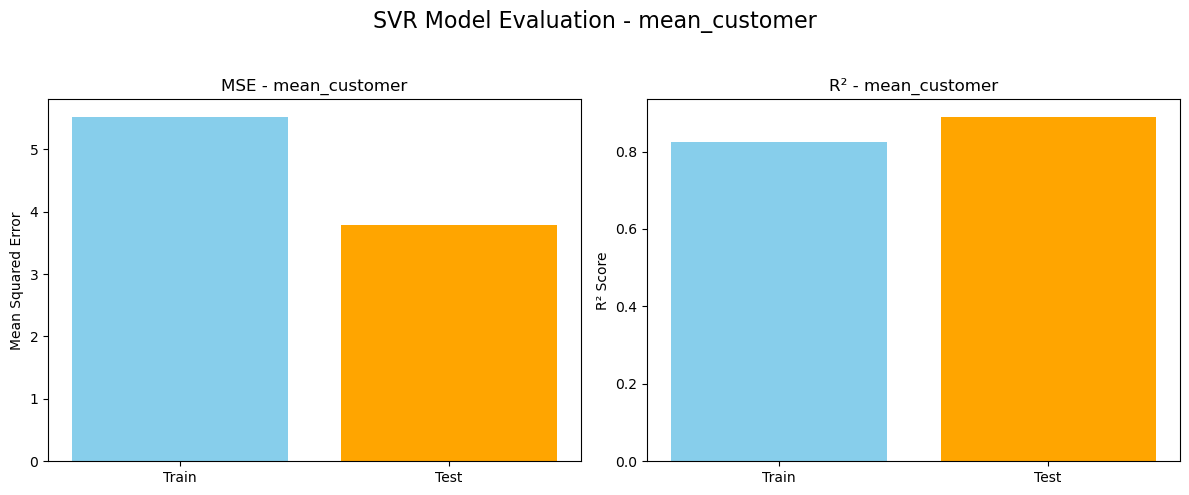

In [353]:
# Data for graphs
metrics_income = {
    'Train': [mse_train_income, r2_train_income],
    'Test': [mse_test_income, r2_test_income]
}
metrics_customer = {
    'Train': [mse_train_customer, r2_train_customer],
    'Test': [mse_test_customer, r2_test_customer]
}

# Create a graph for mean_income
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mean_income
axs[0].bar(
    ['Train', 'Test'], 
    [metrics_income['Train'][0], metrics_income['Test'][0]], 
    color=['skyblue', 'orange']
)
axs[0].set_title('MSE - mean_income')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(
    ['Train', 'Test'], 
    [metrics_income['Train'][1], metrics_income['Test'][1]], 
    color=['skyblue', 'orange']
)
axs[1].set_title('R² - mean_income')
axs[1].set_ylabel('R² Score')

plt.suptitle('SVR Model Evaluation - mean_income', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create a graph for mean_customer
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mean_customer
axs[0].bar(
    ['Train', 'Test'], 
    [metrics_customer['Train'][0], metrics_customer['Test'][0]], 
    color=['skyblue', 'orange']
)
axs[0].set_title('MSE - mean_customer')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(
    ['Train', 'Test'], 
    [metrics_customer['Train'][1], metrics_customer['Test'][1]], 
    color=['skyblue', 'orange']
)
axs[1].set_title('R² - mean_customer')
axs[1].set_ylabel('R² Score')

plt.suptitle('SVR Model Evaluation - mean_customer', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [355]:
# Coefficients from the SVR model for mean_income
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    print("PC coefficient for mean_income:", coef_income)

# Coefficients from the SVR model for mean_customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    print("PC coefficient for mean_customer:", coef_customer)

PC coefficient for mean_income: [1226.47890607 -519.07737493  195.94977677  -31.34499585 -128.09357819]
PC coefficient for mean_customer: [ 0.66146012 -4.75930296  1.35757397  1.12923312 -0.67865394]


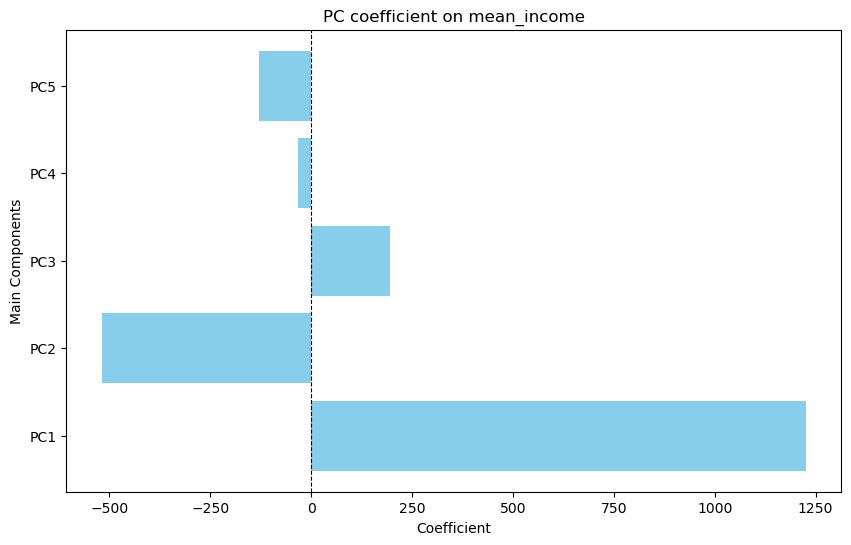

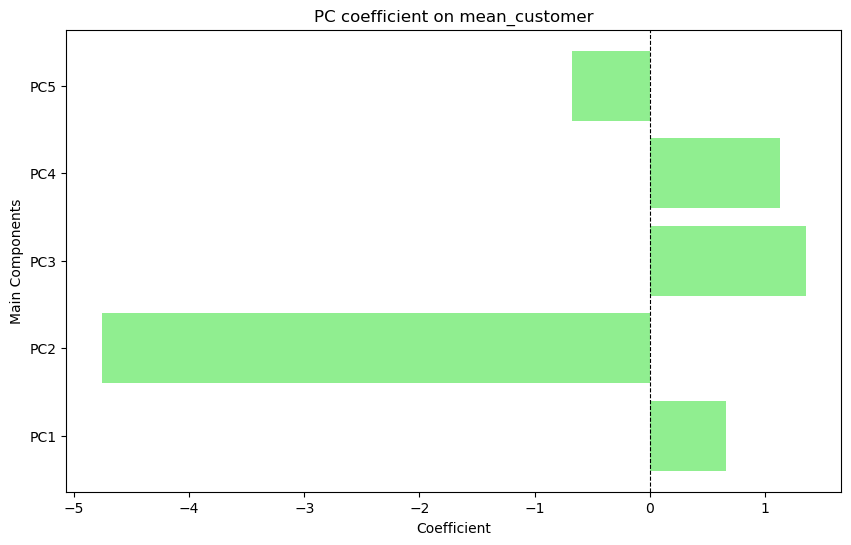

In [357]:
# Create a DataFrame for mean_income
pc_importance_income = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(coef_income))],
    'Coefficient': coef_income
})

# Visualization for mean_income
plt.figure(figsize=(10, 6))
plt.barh(pc_importance_income['PC'], pc_importance_income['Coefficient'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('PC coefficient on mean_income')
plt.xlabel('Coefficient')
plt.ylabel('Main Components')
plt.show()

# Create a DataFrame for mean_customer
pc_importance_customer = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(coef_customer))],
    'Coefficient': coef_customer
})

# Visualization for mean_customer
plt.figure(figsize=(10, 6))
plt.barh(pc_importance_customer['PC'], pc_importance_customer['Coefficient'], color='lightgreen')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('PC coefficient on mean_customer')
plt.xlabel('Coefficient')
plt.ylabel('Main Components')
plt.show()

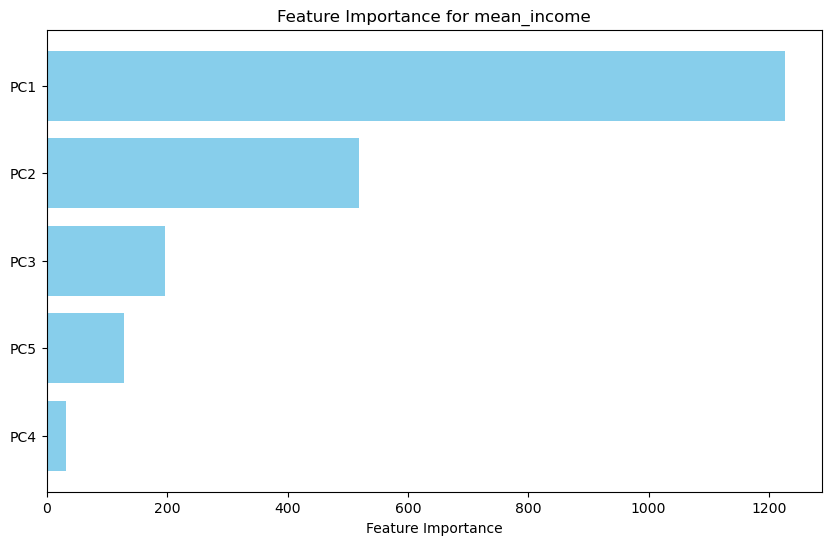

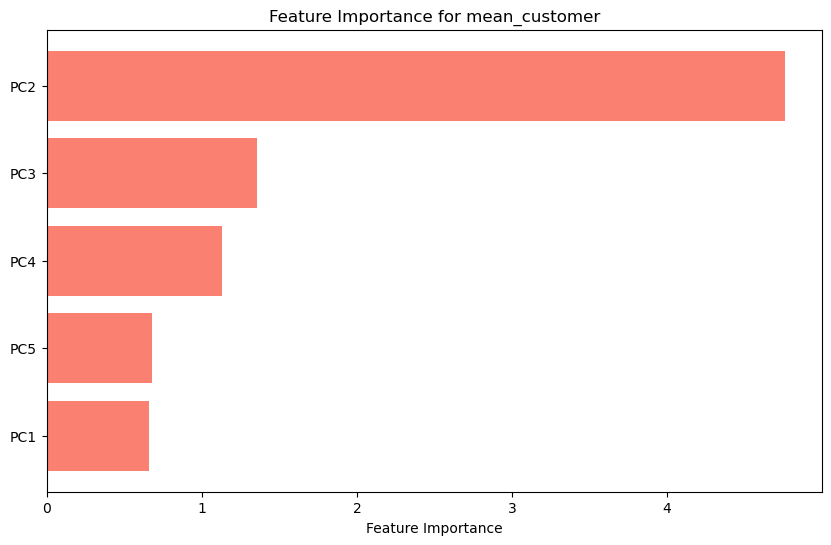

In [364]:
pca = PCA(n_components=5) 
X_train_pca = pca.fit_transform(X_train)

X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# SVR model for mean_income
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    feature_importance_income = pd.DataFrame({
        'Feature': X_train_pca_df.columns,
        'Importance': np.abs(coef_income)
    }).sort_values(by='Importance', ascending=True)

    # Visualize with horizontal bars
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_income['Feature'], feature_importance_income['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for mean_income')
    plt.show()

# SVR model for mean_customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    feature_importance_customer = pd.DataFrame({
        'Feature': X_train_pca_df.columns,
        'Importance': np.abs(coef_customer)
    }).sort_values(by='Importance', ascending=True)

    # Visualize with horizontal bars
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_customer['Feature'], feature_importance_customer['Importance'], color='salmon')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for mean_customer')
    plt.show()

In [376]:
# PCA components that most influence the target
most_important_pc_income = feature_importance_income.iloc[-1]  # Baris terakhir karena diurut ascending
print("PCA most influences mean_income:")
print(most_important_pc_income)

PCA most influences mean_income:
Feature               PC1
Importance    1226.478906
Name: 0, dtype: object


In [368]:
# Loading matrix
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=X_train.columns
)

# The original features that contribute most to an essential PC
pc_key = most_important_pc_income['Feature']
loadings_for_key_pc = loadings[pc_key].sort_values(key=abs, ascending=False)

print(f"Original features that contribute the most to {pc_key}:")
print(loadings_for_key_pc)

Original features that contribute the most to PC1:
host_response_rate_kategori      0.929435
review_scores_rating_kategori    0.367466
bedrooms_log                    -0.020255
price_log                       -0.019407
minimum_nights_log              -0.015723
guests_included_log             -0.009247
host_acceptance_rate_kategori    0.000060
Name: PC1, dtype: float64


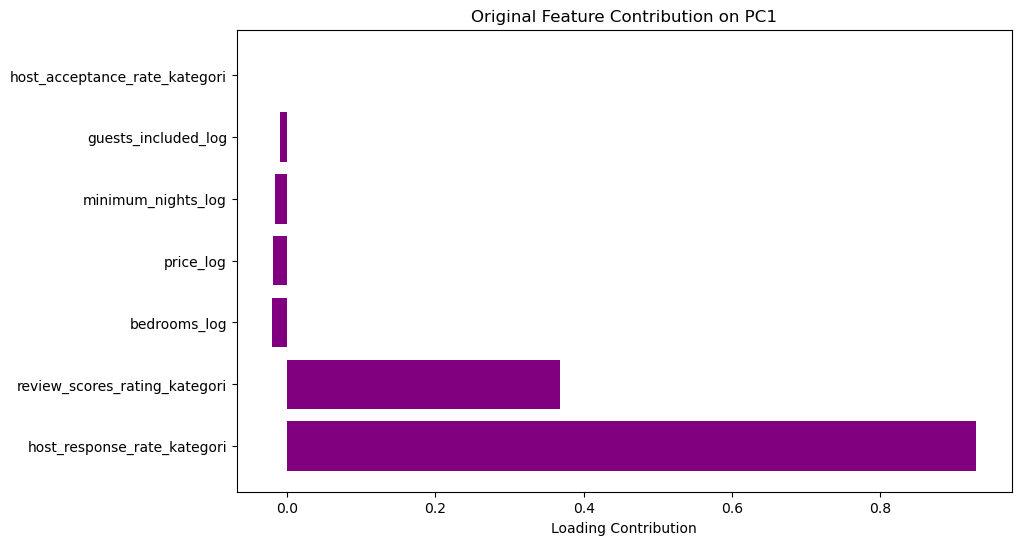

In [370]:
plt.figure(figsize=(10, 6))
plt.barh(loadings_for_key_pc.index, loadings_for_key_pc.values, color='purple')
plt.xlabel('Loading Contribution')
plt.title(f'Original Feature Contribution on {pc_key}')
plt.show()

In [374]:
most_important_pc_customer = feature_importance_customer.iloc[-1]
print("PCA most affects mean_customer:")
print(most_important_pc_customer)

PCA most affects mean_customer:
Feature            PC2
Importance    4.759303
Name: 1, dtype: object


In [378]:
# loading matrix
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=X_train.columns
)

# The original features that contribute most to an essential PC
pc_key = most_important_pc_customer['Feature']
loadings_for_key_pc = loadings[pc_key].sort_values(key=abs, ascending=False)

print(f"Original features that contribute the most to {pc_key}:")
print(loadings_for_key_pc)

Original features that contribute the most to PC2:
review_scores_rating_kategori    0.926725
host_response_rate_kategori     -0.363354
price_log                        0.085506
bedrooms_log                     0.030052
minimum_nights_log               0.027289
guests_included_log              0.013954
host_acceptance_rate_kategori    0.000058
Name: PC2, dtype: float64


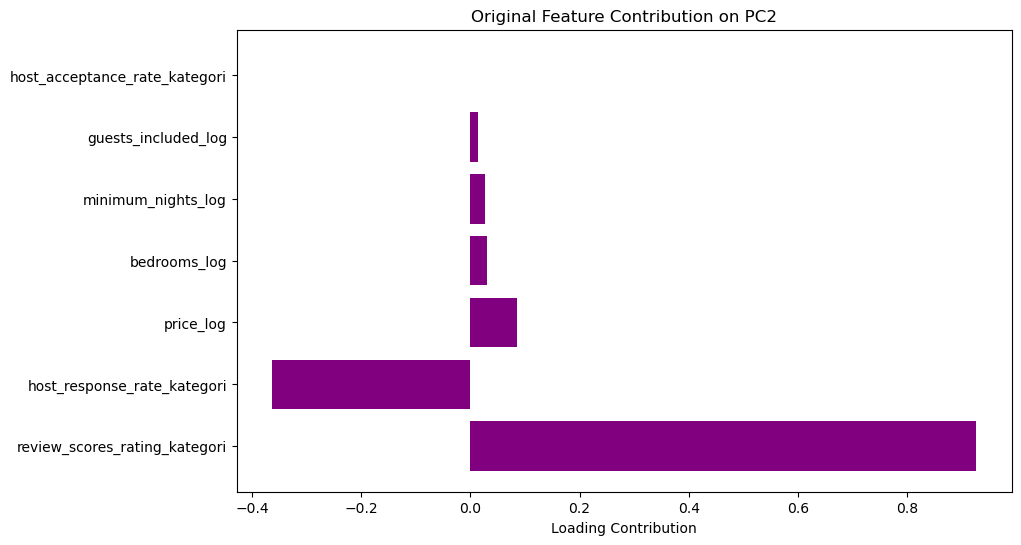

In [380]:
plt.figure(figsize=(10, 6))
plt.barh(loadings_for_key_pc.index, loadings_for_key_pc.values, color='purple')
plt.xlabel('Loading Contribution')
plt.title(f'Original Feature Contribution on {pc_key}')
plt.show()

In [382]:
# Loading matrix
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose so that the features become rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],  # PC name
    index=X_train.columns  # Original feature name
)

# Ambil kontribusi fitur asli untuk PCA1 dan PCA2
loadings_pca1 = loadings['PC1']
loadings_pca2 = loadings['PC2']

In [384]:
# Take the feature importance value from PCA1
importance_pca1_income = feature_importance_income.query('Feature == "PC1"')['Importance'].values[0]

# Calculate the contribution of original features to PCA1
feature_importance_income_original = loadings_pca1 * importance_pca1_income

# Create a DataFrame for the results
feature_importance_income_df = pd.DataFrame({
    'Feature': loadings_pca1.index,
    'Importance': np.abs(feature_importance_income_original)
}).sort_values(by='Importance', ascending=False)

print(feature_importance_income_df)

                                                     Feature   Importance
host_response_rate_kategori      host_response_rate_kategori  1139.932227
review_scores_rating_kategori  review_scores_rating_kategori   450.689275
bedrooms_log                                    bedrooms_log    24.842542
price_log                                          price_log    23.802052
minimum_nights_log                        minimum_nights_log    19.284168
guests_included_log                      guests_included_log    11.341460
host_acceptance_rate_kategori  host_acceptance_rate_kategori     0.073444


In [386]:
# Take the feature importance value from PCA2
importance_pca2_customer = feature_importance_customer.query('Feature == "PC2"')['Importance'].values[0]

# Calculate the contribution of original features to PCA2
feature_importance_customer_original = loadings_pca2 * importance_pca2_customer

# Create a DataFrame for the results
feature_importance_customer_df = pd.DataFrame({
    'Feature': loadings_pca2.index,
    'Importance': np.abs(feature_importance_customer_original)
}).sort_values(by='Importance', ascending=False)

print(feature_importance_customer_df)

                                                     Feature  Importance
review_scores_rating_kategori  review_scores_rating_kategori    4.410567
host_response_rate_kategori      host_response_rate_kategori    1.729312
price_log                                          price_log    0.406947
bedrooms_log                                    bedrooms_log    0.143027
minimum_nights_log                        minimum_nights_log    0.129875
guests_included_log                      guests_included_log    0.066412
host_acceptance_rate_kategori  host_acceptance_rate_kategori    0.000275


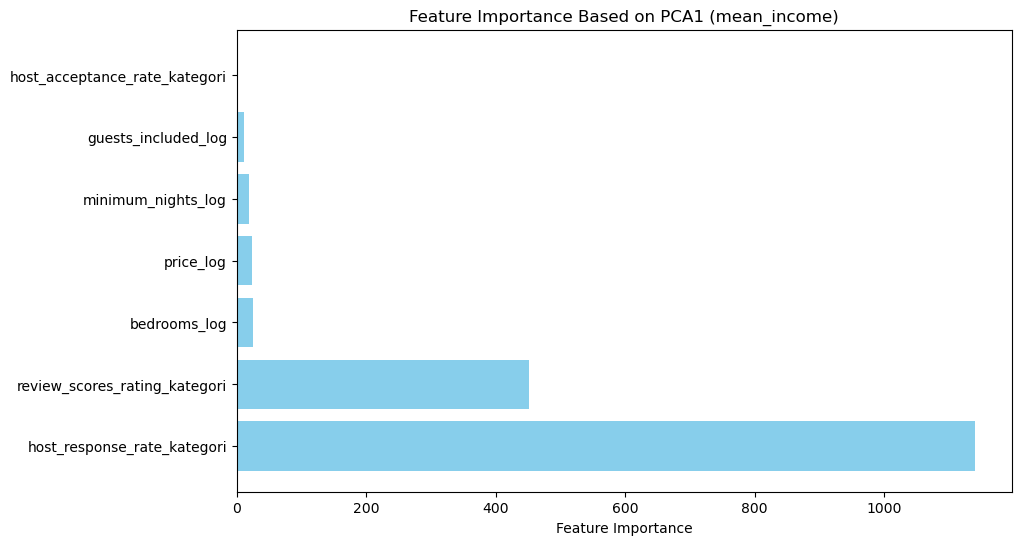

In [388]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_income_df['Feature'], feature_importance_income_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Based on PCA1 (mean_income)')
plt.show()

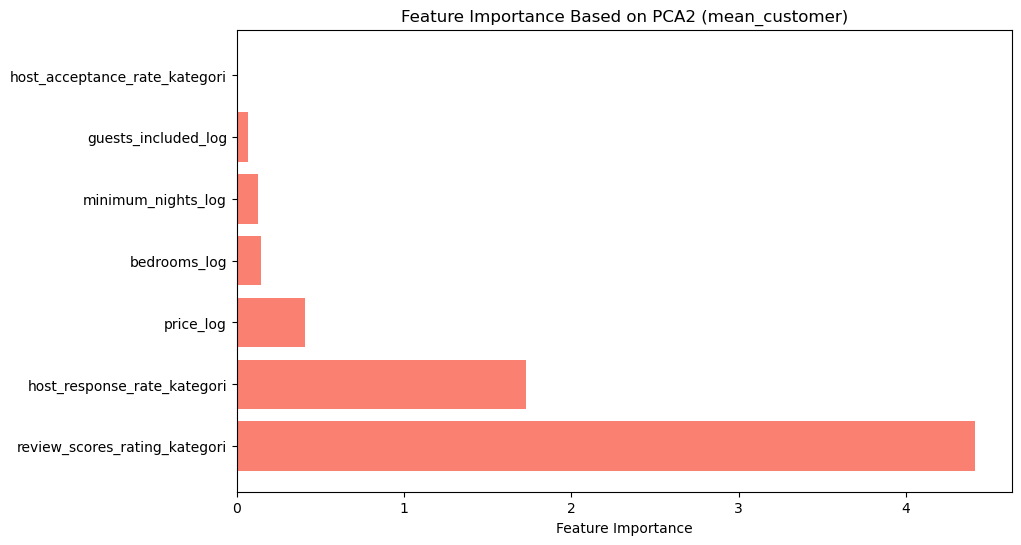

In [396]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_customer_df['Feature'], feature_importance_customer_df['Importance'], color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Based on PCA2 (mean_customer)')
plt.show()

In [392]:
# Create a loading matrix with 5 PCs
loading_matrix = pd.DataFrame(
    pca.components_[:5],  # Take only 5 PCs
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(5)]  # Only up to 5 PCs
)

# Displays loading matrix
print("Loading Matrix (PC to Original Features):")
print(loading_matrix)

Loading Matrix (PC to Original Features):
     review_scores_rating_kategori  host_response_rate_kategori  \
PC1                       0.367466                     0.929435   
PC2                       0.926725                    -0.363354   
PC3                      -0.076122                     0.062682   
PC4                      -0.004819                     0.012302   
PC5                       0.017568                    -0.000391   

     host_acceptance_rate_kategori  bedrooms_log  price_log  \
PC1                       0.000060     -0.020255  -0.019407   
PC2                       0.000058      0.030052   0.085506   
PC3                      -0.000101      0.387068   0.836954   
PC4                       0.000933     -0.021221  -0.161716   
PC5                      -0.000288      0.273991  -0.460114   

     guests_included_log  minimum_nights_log  
PC1            -0.009247           -0.015723  
PC2             0.013954            0.027289  
PC3             0.306799           

In [394]:
# Take the loading matrix from PCA
loading_matrix = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,  # Original feature name
    index=[f'PC{i+1}' for i in range(pca.n_components_)]  # PC name
)

In [398]:
# Loading matrix for PC1 and PC2
pc1_loadings = loading_matrix.loc['PC1']
pc2_loadings = loading_matrix.loc['PC2']

In [400]:
# Original feature contribution DataFrame in PC1
pc1_features = pd.DataFrame({
    'Feature': pc1_loadings.index,
    'Contribution': pc1_loadings.values
}).sort_values(by='Contribution', ascending=False)

In [410]:
# Original feature contribution DataFrame in PC2
pc2_features = pd.DataFrame({
    'Feature': pc2_loadings.index,
    'Contribution': pc2_loadings.values
}).sort_values(by='Contribution', ascending=False)

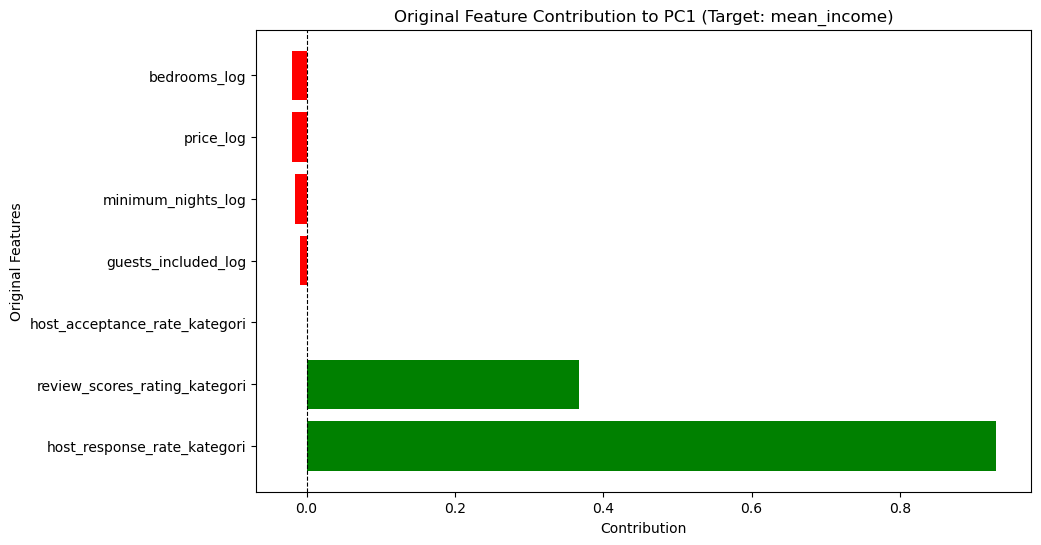

In [412]:
import matplotlib.pyplot as plt

# Visualization of feature contributions in PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_features['Feature'], pc1_features['Contribution'], color=pc1_features['Contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Original Feature Contribution to PC1 (Target: mean_income)')
plt.xlabel('Contribution')
plt.ylabel('Original Features')
plt.show()

In [406]:
corr_guests_included_income = df2[['guests_included_log', 'mean_income']].corr()
print(corr_guests_included_income)

                     guests_included_log  mean_income
guests_included_log             1.000000     0.294877
mean_income                     0.294877     1.000000


In [408]:
corr_price_income = df2[['price_log', 'mean_income']].corr()
print(corr_price_income)

             price_log  mean_income
price_log     1.000000     0.800623
mean_income   0.800623     1.000000


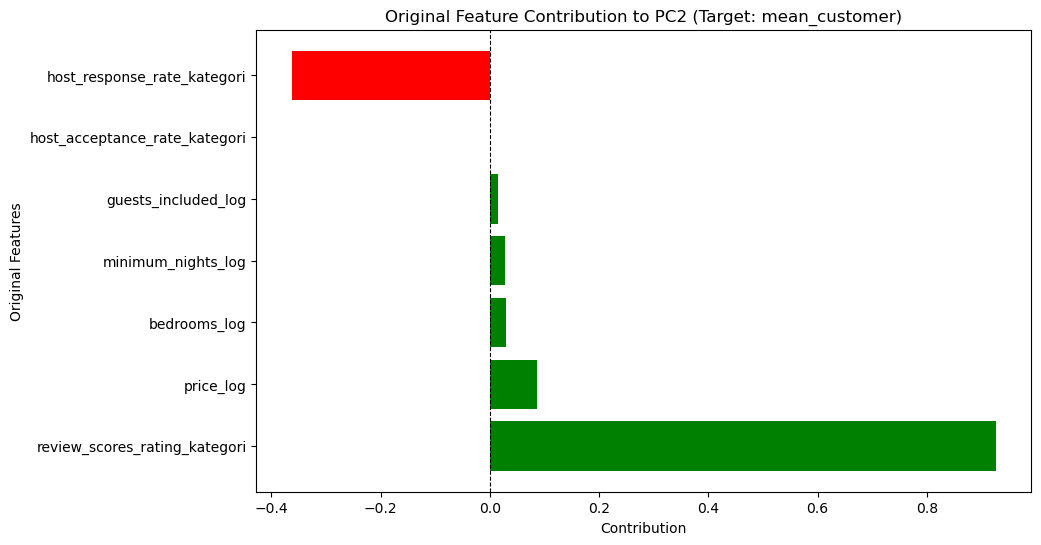

In [414]:
# Visualization of feature contributions in PC2
plt.figure(figsize=(10, 6))
plt.barh(pc5_features['Feature'], pc2_features['Contribution'], color=pc2_features['Contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Original Feature Contribution to PC2 (Target: mean_customer)')
plt.xlabel('Contribution')
plt.ylabel('Original Features')
plt.show()

In [416]:
corr_price_customer = df2[['price_log', 'mean_customer']].corr()
print(corr_price_customer)

               price_log  mean_customer
price_log       1.000000      -0.000483
mean_customer  -0.000483       1.000000


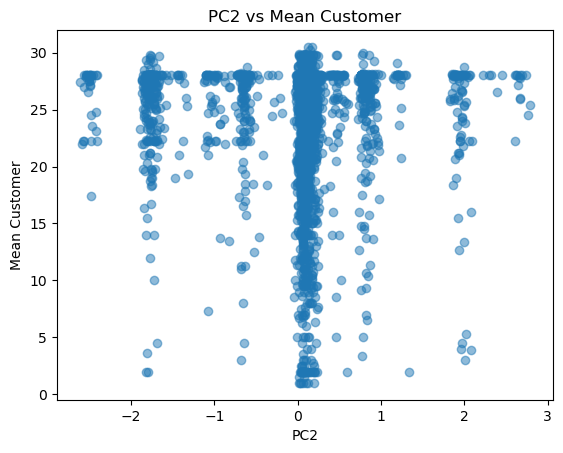

In [418]:
plt.scatter(X_train_pca_df['PC2'], y_train_pca_customer, alpha=0.5)
plt.xlabel('PC2')
plt.ylabel('Mean Customer')
plt.title('PC2 vs Mean Customer')
plt.show()